# ❄️ Exploring Earth's Frozen Edges: Sea Ice, Ice Sheets, and Ocean Change
by: Nina Hall
Welcome!  
In this notebook, we’ll explore how **Earth’s ice and oceans** are changing — and what those changes mean for our planet.  

Even though you may be new to environmental science, don't worry — we’ll go step by step, using maps, charts, and simple explanations.  
By the end, you’ll understand how scientists monitor **sea ice**, **ice sheets**, and **ocean heat** to track the heartbeat of our climate system.  

---

### 🧊 Key Ideas We'll Explore
- **Sea Ice:** Floating ice that forms when seawater freezes.  
- **Ice Sheets:** Huge land-based glaciers covering Greenland and Antarctica.  
- **Ocean Heat Content (OHC):** How much heat the ocean stores — the biggest driver of global sea-level rise.  
- **Steric Sea Level:** Sea level changes caused by *thermal expansion* (warm water takes up more space).  

Together, these topics reveal how Earth’s polar regions respond to — and influence — global climate change.


In [1]:
#get packages
import xarray as xr
import numpy as np    ## for nice colormaps. 
from matplotlib import cm
from matplotlib import colormaps as colormap   ## for plotting geo spatial data
from cartopy import crs as ccrs, feature as cfeature  ## needed for nice looking polar projections.
import momlevel as ml             ## for computing annual mean and seasonal cycle.
import zarr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean 
import matplotlib.path as mpath

In [2]:
## Load a dataset of sea ice concentration from NOAA and assign to a variable :
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'  #### Navigate to out home directory 
seaice_conc = xr.open_zarr(ees_climate_dir +'project_three/data/seaice_concentration_data')
seaice_cellarea = xr.open_dataset(ees_climate_dir + 'project_three/data/cell_area_seaiceconc.nc')
AIS_mass = pd.read_csv(ees_climate_dir+'project_three/data/imbie/mb_ais_gt_mm_ann.csv')
GRIS_mass = pd.read_csv(ees_climate_dir+'project_three/data/imbie/mb_gris_gt_mm_ann.csv')
GRIS_AIS_comb_mass = pd.read_csv(ees_climate_dir+'project_three/data/imbie/mb_combined_gt_mm_ann.csv')
ohc_annual= pd.read_csv(ees_climate_dir+'project_three/data/ocean_iap/processed_ohc_annual.csv')
ssl_annual= pd.read_csv(ees_climate_dir+'project_three/data/ocean_iap/processed_ssl_annual.csv')

In [4]:
ohc_annual

,Year,OHC0-700m,Smoothed OHC0-700m,"Error, 95% CI OHC0-700m",OHC700-2000m,Smoothed OHC700-2000m,"Error, 95% CI OHC700-2000m",OHC0-2000m,Smoothed OHC0-2000m,"Error, 95% CI OHC0-2000m",OHC2000-6000m,Smoothed OHC2000-6000m,"Error, 95% CI OHC2000-6000m"
0,1940,-24.679167,-25.085000,9.345833,-10.236667,-10.261667,8.225833,-34.917500,-35.343333,13.625833,NaN,NaN,NaN
1,1941,-24.913333,-24.771667,8.776667,-10.225833,-10.207500,7.911667,-35.140000,-34.976667,12.684167,NaN,NaN,NaN
2,1942,-22.325833,-22.387500,8.885000,-9.863333,-9.864167,8.046667,-32.187500,-32.252500,12.790000,NaN,NaN,NaN
3,1943,-21.281667,-21.355833,9.012500,-9.626667,-9.599167,8.343333,-30.910833,-30.955833,13.380000,NaN,NaN,NaN
4,1944,-21.326667,-21.146667,8.740000,-9.680833,-9.710000,8.529167,-31.005833,-30.855833,13.357500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2019,6.425833,6.450000,0.385833,3.058333,3.047500,0.313333,9.484167,9.500000,0.467500,0.903333,1.899167,0.155000
80,2020,6.945000,6.970833,0.398333,3.360833,3.390000,0.290000,10.303333,10.363333,0.447500,0.131667,2.128333,0.100833
81,2021,8.056667,7.988333,0.436667,4.020000,3.968333,0.265000,12.076667,11.956667,0.512500,0.324167,2.325833,0.109167
82,2022,9.560833,9.537500,0.516667,4.233333,4.240000,0.282500,13.793333,13.776667,0.622500,0.481667,2.490833,0.125000


![IPCC AR6 WGI Cross-Chapter Box 9.1](https://ipcc.ch/report/ar6/wg1/downloads/figures/IPCC_AR6_WGI_CCBox_9_1_Figure_1.png)

#### <font color=red> Summary of IPCC AR6 Cross-Chapter Box 9.1  
**Global Energy Inventory and Sea Level Budget (1971–2018)**  

This figure presents two panels summarizing Earth's energy balance and sea level changes over the period 1971–2018:

- **Panel (a)** shows how excess heat has been absorbed within the Earth system—primarily by the **ocean**, with smaller contributions from the **land**, **ice melt**, and the **atmosphere**. The red bar on the right indicates the total Earth system heating and its uncertainty range.

- **Panel (b)** illustrates the corresponding **components of global mean sea level rise**, including **thermal expansion**, **glacier and ice sheet melt**, and **land-water storage changes**. The dashed line compares these to observed global mean sea level from **tide gauges (1971–1993)** and **satellite altimetry (1993–2018)**.

On the right side, red and black bars demonstrate that the **sum of all contributing components** closely matches the **observed total sea level rise**, indicating that the **global sea level budget is effectively closed** within uncertainty limits.

(Source: IPCC 6th Assesment)

## 🌊 Ocean Heat Content (OHC)

The ocean absorbs and stores most of the planet’s excess heat.  
Tracking **Ocean Heat Content (OHC)** helps scientists understand how much energy the Earth system is retaining as greenhouse gases trap more heat.

On the maps below, warmer colors show regions gaining heat; cooler colors show where the ocean has released or redistributed heat.

🧠 *Think about it:*  
If the ocean is storing more heat than before, what might that mean for sea level, storms, and ecosystems?


## <font color=red> We can use the Formula below to compute OHC: 

### $$OHC_{global} = \sum_{x,y} \sum_{i=1}^{n} \rho_{i,x,y} \, c_{p,i,x,y} \, [T_{i,x,y} - T_{ref}] \, \Delta z_i \, \Delta A_{x,y}$$

| Symbol | Description | Units |
| :----------------- | :------------------------------------------------------------------------------------------------------------ | :------------------- |
| $OHC_{global}$ | Total global ocean heat content | Joules (J) |
| $T_{i,x,y}$ | Ocean temperature at depth level $(i)$, latitude–longitude grid cell $(x, y)$ | °C or K |
| $T_{ref}$ | Reference temperature (commonly $0~°C$ or a baseline climatology) | °C or K |
| $\rho_{i,x,y}$ | Seawater density at each grid cell (often approximated as $1025~\mathrm{kg·m^{-3}}$ if salinity data unavailable) | $\mathrm{kg·m^{-3}}$ |
| $c_{p,i,x,y}$ | Specific heat capacity of seawater ($\approx 3985~\mathrm{J·kg^{-1}·K^{-1}}$) | $\mathrm{J·kg^{-1}·K^{-1}}$ |
| $\Delta z_i$ | Thickness of the $(i^{th})$ vertical layer | m |
| $\Delta A_{x,y}$ | Horizontal area of grid cell (varies with latitude; $\Delta A = R^2 \cos(\phi)\, \Delta \lambda\, \Delta \phi$) | $\mathrm{m^2}$ |
| $n$ | Number of depth levels  | — |       |


In [32]:
ohc_annual

,Year,OHC0-700m,Smoothed OHC0-700m,"Error, 95% CI OHC0-700m",OHC700-2000m,Smoothed OHC700-2000m,"Error, 95% CI OHC700-2000m",OHC0-2000m,Smoothed OHC0-2000m,"Error, 95% CI OHC0-2000m",OHC2000-6000m,Smoothed OHC2000-6000m,"Error, 95% CI OHC2000-6000m"
0,1940,-24.679167,-25.085000,9.345833,-10.236667,-10.261667,8.225833,-34.917500,-35.343333,13.625833,NaN,NaN,NaN
1,1941,-24.913333,-24.771667,8.776667,-10.225833,-10.207500,7.911667,-35.140000,-34.976667,12.684167,NaN,NaN,NaN
2,1942,-22.325833,-22.387500,8.885000,-9.863333,-9.864167,8.046667,-32.187500,-32.252500,12.790000,NaN,NaN,NaN
3,1943,-21.281667,-21.355833,9.012500,-9.626667,-9.599167,8.343333,-30.910833,-30.955833,13.380000,NaN,NaN,NaN
4,1944,-21.326667,-21.146667,8.740000,-9.680833,-9.710000,8.529167,-31.005833,-30.855833,13.357500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2019,6.425833,6.450000,0.385833,3.058333,3.047500,0.313333,9.484167,9.500000,0.467500,0.903333,1.899167,0.155000
80,2020,6.945000,6.970833,0.398333,3.360833,3.390000,0.290000,10.303333,10.363333,0.447500,0.131667,2.128333,0.100833
81,2021,8.056667,7.988333,0.436667,4.020000,3.968333,0.265000,12.076667,11.956667,0.512500,0.324167,2.325833,0.109167
82,2022,9.560833,9.537500,0.516667,4.233333,4.240000,0.282500,13.793333,13.776667,0.622500,0.481667,2.490833,0.125000


In [41]:

### Set the values to be used in colormap
ohc_annual700_2000_values =ohc_annual['Smoothed OHC700-2000m'] 
norm = plt.Normalize(min(ohc_annual700_2000_values), 
                     max(ohc_annual700_2000_values))
Bar_colors_pink= colormap ['cool']

# Apply colormap
cmap_cool = colormap.get_cmap('cool')
## Normalize
Bar_colors_pink = cmap_cool(norm(ohc_annual700_2000_values))


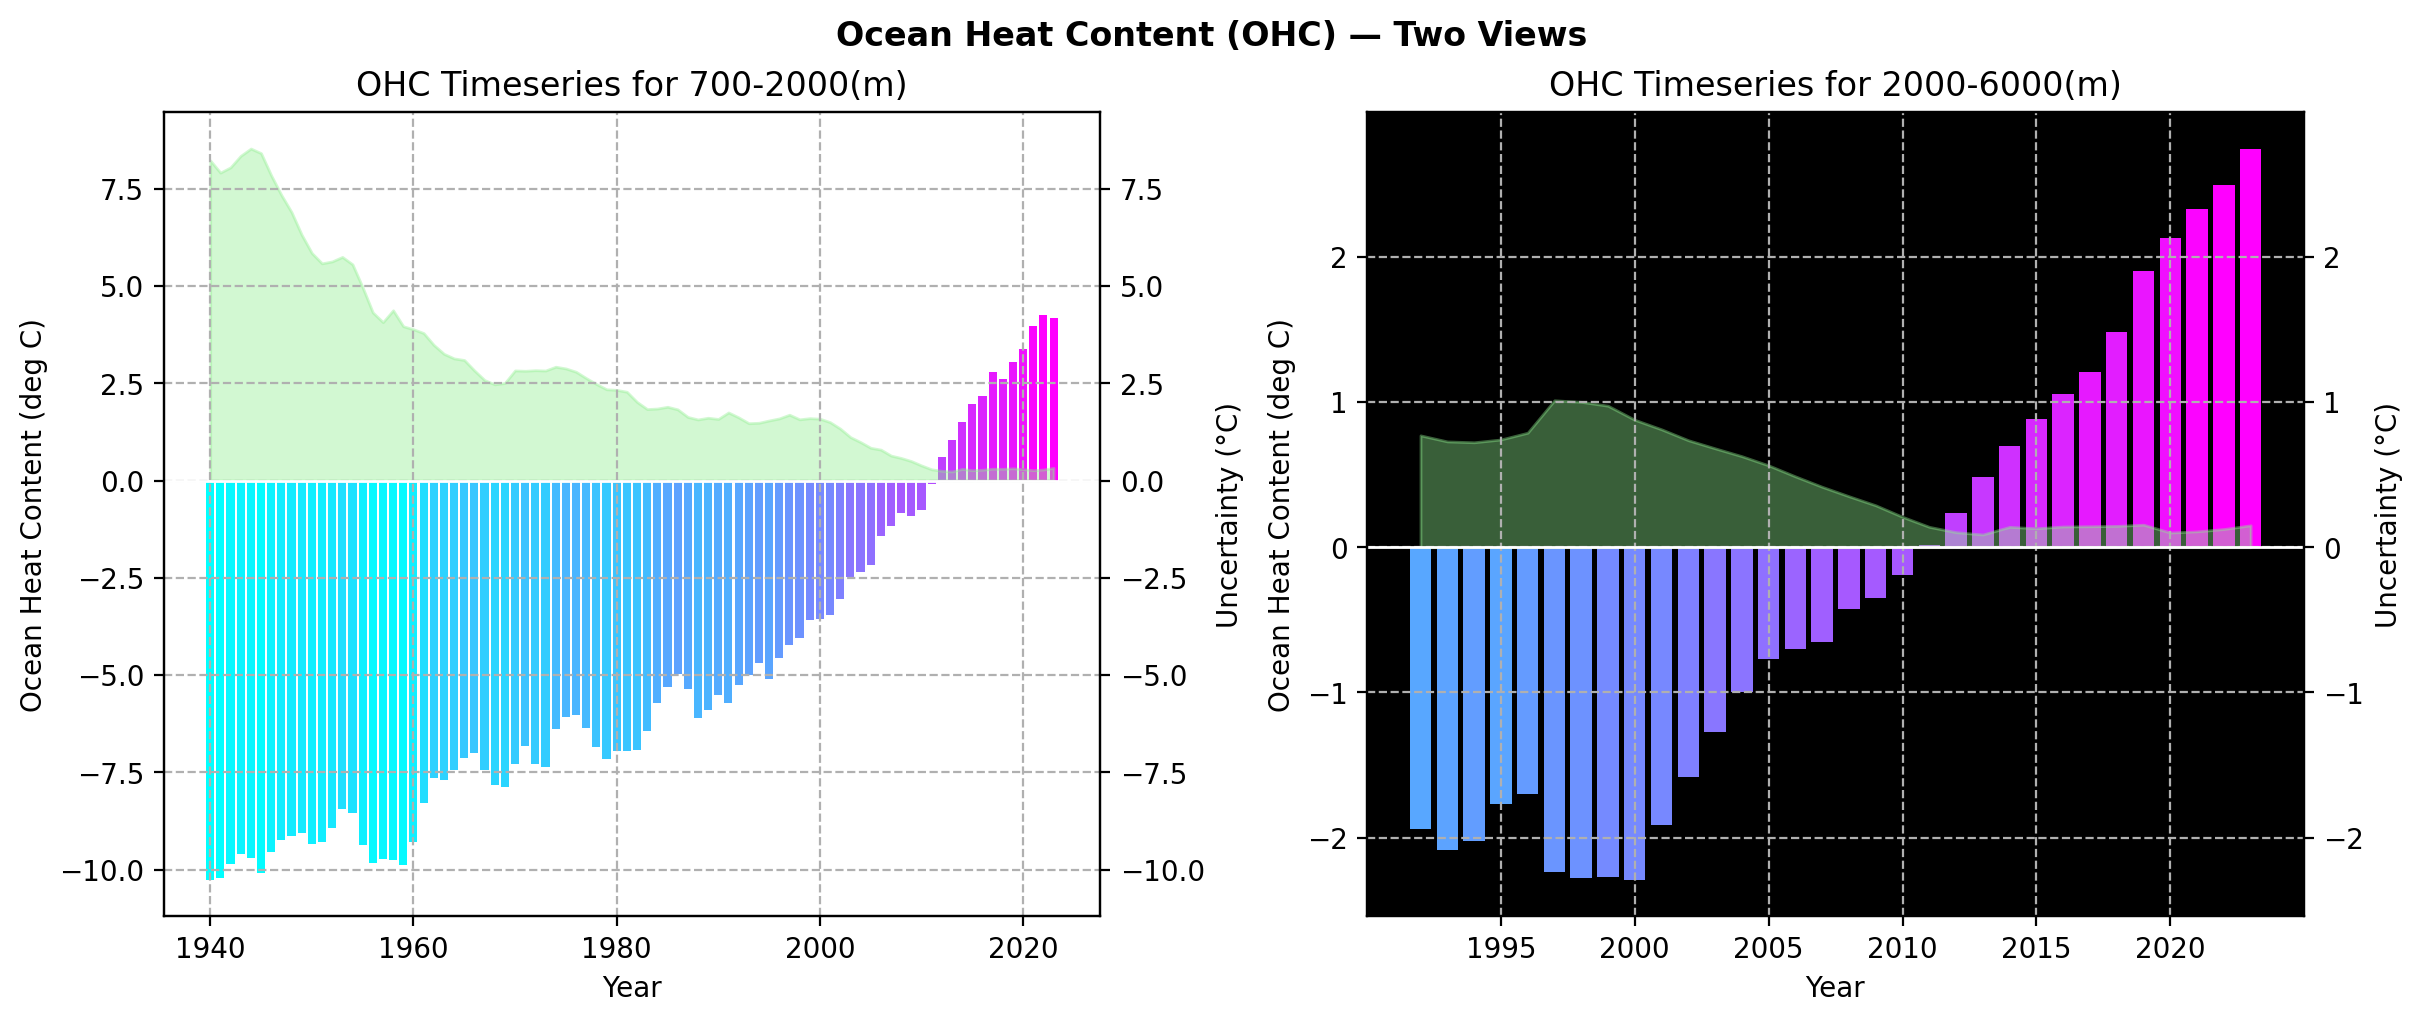

In [39]:
%config InlineBackend.figure_format = 'retina'
# === OHC MAPS — 2 SUBPLOTS SIDE BY SIDE ===
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    1, 2, figsize=(12, 5), constrained_layout=True,
    subplot_kw=getattr({}, "subplot_kw", None)  # harmless placeholder if you used Cartopy in the originals
)

# --- Left OHC map ---
ax = axes[0]
ax.bar(ohc_annual['Year'], ohc_annual['Smoothed OHC700-2000m'], linewidth=2,label=' OHC700-2000m', color=Bar_colors_pink) 

 ## add a horizontal line at 0 
ax.axhline(0,color='white',linewidth=1)

 ## add plot title:
ax.set_title('OHC Timeseries for 700-2000(m)')

    ## add axes labes:
ax.set_ylabel('Ocean Heat Content (deg C)')
ax.set_xlabel(' Year ')

ax.fill_between(ohc_annual['Year'],ohc_annual['Error, 95% CI OHC700-2000m'],color='lightgreen', alpha=0.4, label='Uncertainty range')

ax2 = ax.twinx()  # create a new y-axis that shares the same x-axis
ax2.set_ylabel('Uncertainty (°C)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax.grid(linestyle='--') ### add dashed grid lines
#Match limits of secondary axis to uncertainty range
ax2.set_ylim(ax.get_ylim())

# --- Right OHC map ---
ax = axes[1]
ax.bar(ohc_annual['Year'],
        ohc_annual['Smoothed OHC2000-6000m'],
        linewidth=2,label='OHC2000-6000m',
        color=Bar_colors_pink
        ) 

ax.fill_between(ohc_annual['Year'],ohc_annual['Error, 95% CI OHC2000-6000m'],color='lightgreen', alpha=0.4, label='Uncertainty range')

ax2 = ax.twinx()  # create a new y-axis that shares the same x-axis
ax2.set_ylabel('Uncertainty (°C)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax.grid(linestyle='--') ### add dashed grid lines
#Match limits of secondary axis to uncertainty range
ax2.set_ylim(ax.get_ylim())
## add a horizontal line at 0 
ax.axhline(0,color='white',linewidth=1)

## add plot title:
ax.set_title('OHC Timeseries for 2000-6000(m)')

## add axes labes:
ax.set_ylabel('Ocean Heat Content (deg C)')
ax.set_xlabel(' Year ')


ax.grid(linestyle='--') ### add dashed grid lines

# set plot background color
ax.set_facecolor("k")

fig.suptitle("Ocean Heat Content (OHC) — Two Views", fontweight="bold")
plt.show()

**Figure 1.** Global Ocean Heat Content (OHC) maps showing spatial patterns of ocean heat gain and loss. Warmer colors indicate areas where the ocean has absorbed more heat energy, while cooler colors represent regions of reduced heat content or heat release.

![Cryosphereimage](https://i.pinimg.com/originals/44/46/06/444606d03bc033b01ae89b7fe625e395.jpg)

### The Cryosphere: Earth's Frozen System

The image above illustrates the **cryosphere**, which includes all of Earth’s frozen water —  
sea ice, glaciers, snow cover, permafrost, and the vast ice sheets of Greenland and Antarctica.

These frozen regions are not just static blocks of ice; they are dynamic parts of the **climate system**.  
They reflect sunlight, store freshwater, and interact with the atmosphere and ocean to regulate global temperature.

Changes in the cryosphere are some of the clearest indicators of climate change.  
As ice melts and snow cover declines, more sunlight is absorbed by darker ocean and land surfaces, further warming the planet.  
Understanding these processes helps scientists predict **future sea-level rise**, **temperature patterns**, and **ecosystem responses** across the globe.


The term *"ice sheet mass balance"* and the processes controlling it are foundational concepts derived from studies like the **Ice Sheet Mass Balance Inter-comparison Exercise (IMBIE)**, which quantify how much ice sheets contribute to global sea level rise.

---

### <font color=red> What is meant by the term “ice sheet mass balance”?

**Ice sheet mass balance** is the **net change in the total mass of an ice sheet** over time.  
It reflects the balance between **mass gained** (mainly through snowfall and accumulation) and **mass lost** (through melting, calving, sublimation, and ice discharge).  
A **positive mass balance** means the ice sheet is growing, while a **negative mass balance** indicates it is losing mass and contributing to sea level rise.

---

### <font color=red> What processes control the mass balance of an ice sheet or glacier?

Mass balance is controlled by the **inputs and outputs** of the **cryosphere**:

| **Mass Inputs (Gain)** | **Mass Outputs (Loss)** |
| :---------------------- | :---------------------- |
| Snow accumulation / Precipitation | Ice discharge to the ocean (calving) |
|                         | Surface melt and runoff |
|                         | Sublimation (ice transitioning straight to water vapor) |
|                         | Ocean-driven melting at glacier fronts |

<font color=red>**Basic Equation:**

$[
\Delta M = SMB - D\
]$

Where:  
- **ΔM** = total mass change  
- **SMB** = surface mass balance (precipitation − sublimation − melt runoff)  
- **D** = dynamic ice discharge to the ocean ean  





---

### <font color=red> What is meant by the term “sea level equivalent”?

**Sea level equivalent (SLE)** expresses how much **global mean sea level** would rise or fall if a certain amount of ice mass were **added to or removed from the oceans**.

- Ice mass changes are measured in **gigatonnes (Gt)** or **Gt per year (Gt yr⁻¹)**.  
- The same changes can be expressed as **millimeters (mm)** or **mm yr⁻¹** of **global sea level equivalent**.  

For example:  
Losing 360 Gt of ice corresponds roughly to **1 mm of global sea level rise**.

This unit helps translate ice sheet mass loss into a direct, globally relevant measure of climate impact.”

(NASA Sea Level, 2015)

### <font color=red> Total Sea Level Equivalent (SLE) from Complete Ice Sheet Melt

- **Antarctic Ice Sheet (AIS):** Contains enough water to raise global sea level by **≈ 58 meters**.  
- **Greenland Ice Sheet (GIS):** Contains enough water to raise global sea level by **≈ 7.4 meters**.  

**Combined Potential Sea Level Rise:**  
If both the Antarctic and Greenland ice sheets were to melt completely, global mean sea level would rise by approximately **65.4 meters**.


### <font color=red> Contributions of the Greenland and Antarctic Ice Sheets to Global Sea Level Rise (1992–2018)

Based on comprehensive satellite observations, the **Greenland Ice Sheet (GIS)** has contributed the most to global mean sea level rise since 1992.

| **Ice Sheet** | **Period Covered** | **Cumulative Mass Loss (Gt)** | **Sea Level Equivalent (mm)** |
| :-------------: | :----------------: | :---------------------------: | :----------------------------: |
| **Greenland Ice Sheet (GIS)** | 1992–2017 |  2,720 ± 1,390 | **10.8 ± 0.9 mm** |
| **Antarctic Ice Sheet (AIS)** | 1992–2017 | 2,720 ± 1,390 | **7.6 ± 3.9 mm** |

**Summary:**  
From 1992 to 2018, Greenland contributed about **10.8 mm** to global sea level rise, while Antarctica contributed about **7.6 mm**. Despite holding only ~12% of Earth’s total land ice volume, Greenland’s mass loss was roughly **38% greater** than Antarctica’s, driven by stronger **atmospheric and oceanic warming** around Greenland.
 
(The IMBIE Team: Mass balance of the Antarctic Ice Sheet from 1992 to 2017, 2018)
(The IMBIE Team: Mass balance of the Greenland Ice Sheet from 1992 to 2018)


![Greenland and Antarctic Ice sheet](https://images.fineartamerica.com/images-medium-large-5/greenland-and-antarctic-ice-sheets-nasa.jpg)

### Greenland and Antarctic Ice Sheets

This image highlights Earth's two major ice sheets — **Greenland** in the Northern Hemisphere and **Antarctica** in the Southern Hemisphere.  
Together, they contain nearly all of the planet’s freshwater ice and are the largest potential contributors to **global sea-level rise**.

- **Greenland Ice Sheet (on left):**  
  Located in the Arctic, it covers about 1.7 million square kilometers.   
  Meltwater from Greenland flows directly into the North Atlantic Ocean, influencing ocean circulation and sea-level rise in the Northern Hemisphere.

- **Antarctic Ice Sheet(on right):**  
  Much larger, covering roughly 14 million square kilometers.  
  It is divided into the **East Antarctic** and **West Antarctic** regions.  
  The West Antarctic Ice Sheet, grounded below sea level, is particularly vulnerable to warm ocean currents that can melt it from beneath.

The colors and textures in this visualization show the contrast between the bright, reflective ice surfaces and the surrounding darker ocean and land areas.  
Together, these two ice sheets act as sensitive indicators of climate change and major controls on future sea-level change.


(NSDIC Ice Sheets)

In [9]:
ssl_annual

,Year,SSL0-300m,"SSL0-300m, 95%CI",SSL0-700m,"SSL0-700m, 95%CI",SSL0-2000m,"SSL0-2000m, 95%CI"
0,1940,-22.764167,6.120833,-33.832500,8.519167,-43.164167,14.769167
1,1941,-20.986667,5.774167,-32.678333,8.155000,-42.005000,14.020000
2,1942,-19.533333,5.641667,-30.049167,8.259167,-38.444167,13.979167
3,1943,-19.774167,5.263333,-29.295000,7.977500,-37.058333,13.805833
4,1944,-19.076667,4.694167,-28.836667,7.062500,-36.628333,13.074167
...,...,...,...,...,...,...,...
79,2019,5.244167,0.212500,6.485000,0.307500,7.158333,0.583333
80,2020,5.022500,0.242500,6.415833,0.319167,7.362500,0.614167
81,2021,5.335833,0.253333,7.264167,0.354167,8.642500,0.680833
82,2022,5.988333,0.265000,7.953333,0.370833,8.838333,0.760000


## 🌊 Steric Sea Level — The Ocean Expands as It Warms

When water warms up, it expands. This “thermal expansion” doesn’t add more water to the ocean —  
it just takes up more space, causing **steric sea-level rise**.

Here, we compare different steric components through time and space.  
Even though it’s invisible, this process contributes **about one-third of modern sea-level rise**!

💡 *Hint:* If you’ve ever watched soup bubble up as it heats, you already understand steric sea-level rise.


In [47]:
### Set the values to be used in colormap
ssl_300m_values =ssl_annual['SSL0-300m'] 
norm = plt.Normalize(min(ssl_300m_values), 
                     max(ssl_300m_values))

# Apply colormap
cmap_seismic = colormap.get_cmap('seismic')
## Normalize
Bar_colors_seismic = cmap_seismic(norm(ssl_300m_values))

Bar_colors_ice= colormap ['seismic']
### Set the values to be used in colormap
ssl_700m_values =ssl_annual['SSL0-700m'] 
norm = plt.Normalize(min(ssl_700m_values), 
                     max(ssl_700m_values))

# Apply colormap
cmap_seismic = colormap.get_cmap('seismic')
## Normalize
Bar_colors_seismic_700 = cmap_seismic(norm(ssl_700m_values))

Bar_colors_ice= colormap ['seismic']
### Set the values to be used in colormap
ssl_2000m_values =ssl_annual['SSL0-2000m'] 
norm = plt.Normalize(min(ssl_2000m_values), 
                     max(ssl_2000m_values))

# Apply colormap
cmap_seismic = colormap.get_cmap('seismic')
## Normalize
Bar_colors_seismic_2000 = cmap_seismic(norm(ssl_2000m_values))

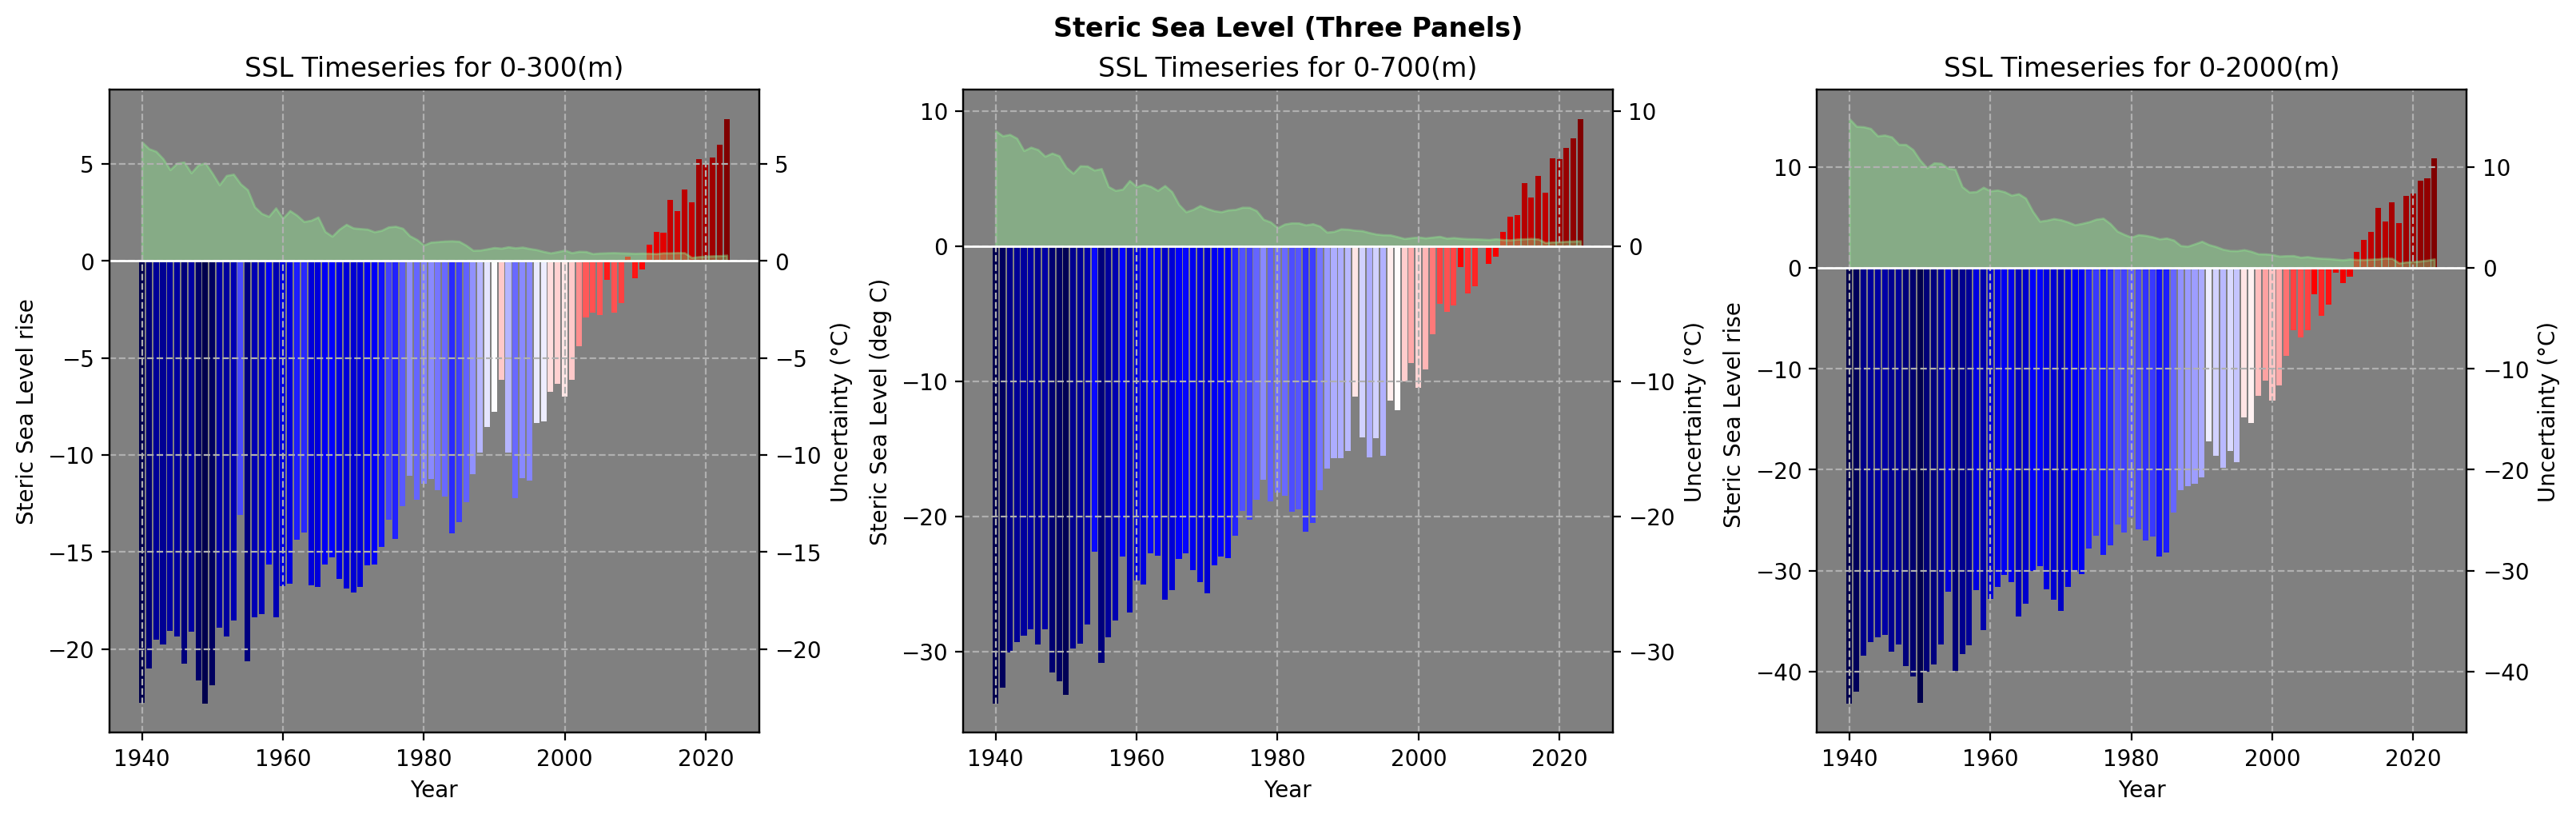

In [49]:
%config InlineBackend.figure_format = 'retina'
fig, axes = plt.subplots(1, 3, figsize=(16, 5), constrained_layout=True)

# --- Steric #1 ---
ax = axes[0]
ax.bar(ssl_annual['Year'],
        ssl_annual['SSL0-300m'],
        linewidth=2,
        color= Bar_colors_seismic
        ) 

ax.fill_between(ssl_annual['Year'],ssl_annual['SSL0-300m, 95%CI'],color='lightgreen', alpha=0.4, label='Uncertainty range')

ax2 = ax.twinx()  # create a new y-axis that shares the same x-axis
ax2.set_ylabel('Uncertainty (°C)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax.grid(linestyle='--') ### add dashed grid lines
#Match limits of secondary axis to uncertainty range
ax2.set_ylim(ax.get_ylim())
## add a horizontal line at 0 
ax.axhline(0,color='white',linewidth=1)

## add plot title:
ax.set_title('SSL Timeseries for 0-300(m)')

## add axes labes:
ax.set_ylabel('Steric Sea Level rise')
ax.set_xlabel(' Year ')


ax.grid(linestyle='--') ### add dashed grid lines

# set plot background color
ax.set_facecolor("gray")
# --- Steric #2 ---
ax = axes[1]
ax.bar(ssl_annual['Year'],
        ssl_annual['SSL0-700m'],
        linewidth=2,
        color=Bar_colors_seismic_700
        ) 

ax.fill_between(ssl_annual['Year'],ssl_annual['SSL0-700m, 95%CI'],color='lightgreen', alpha=0.4, label='Uncertainty range')

ax2 = ax.twinx()  # create a new y-axis that shares the same x-axis
ax2.set_ylabel('Uncertainty (°C)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax.grid(linestyle='--') ### add dashed grid lines
#Match limits of secondary axis to uncertainty range
ax2.set_ylim(ax.get_ylim())
## add a horizontal line at 0 
ax.axhline(0,color='white',linewidth=1)

## add plot title:
ax.set_title('SSL Timeseries for 0-700(m)')

## add axes labes:
ax.set_ylabel('Steric Sea Level (deg C)')
ax.set_xlabel(' Year ')


ax.grid(linestyle='--') ### add dashed grid lines

# set plot background color
ax.set_facecolor("gray")
# --- Steric #3 ---
ax = axes[2]
ax.bar(ssl_annual['Year'],
        ssl_annual['SSL0-2000m'],
        linewidth=2,
        color=Bar_colors_seismic_2000
        ) 

ax.fill_between(ssl_annual['Year'],ssl_annual['SSL0-2000m, 95%CI'],color='lightgreen', alpha=0.4, label='Uncertainty range')

ax2 = ax.twinx()  # create a new y-axis that shares the same x-axis
ax2.set_ylabel('Uncertainty (°C)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax.grid(linestyle='--') ### add dashed grid lines
#Match limits of secondary axis to uncertainty range
ax2.set_ylim(ax.get_ylim())
## add a horizontal line at 0 
ax.axhline(0,color='white',linewidth=1)

## add plot title:
ax.set_title('SSL Timeseries for 0-2000(m)')

## add axes labes:
ax.set_ylabel('Steric Sea Level rise ')
ax.set_xlabel(' Year ')


ax.grid(linestyle='--') ### add dashed grid lines

# set plot background color
ax.set_facecolor("gray")

fig.suptitle("Steric Sea Level (Three Panels)", fontweight="bold")

plt.show()

**Figure 2.** Steric sea-level components showing thermal expansion of seawater due to ocean warming. These panels illustrate how changes in temperature and salinity influence sea level without adding water mass.

### <font color=red> What does this uncertainty represent?

The **uncertainty** represents the **range of possible error** in the measured or estimated values of **ocean heat content (OHC)** and **steric sea level** for each year.  
It reflects how confident scientists are in the accuracy of the data, based on:
- Measurement limitations such as sparse or uneven sampling before modern instruments like Argo floats.  
- Instrument precision, including differences among sensors and satellites.  
- Data processing methods like interpolation, calibration, and bias corrections.  

In simple terms, uncertainty shows how much the true value could differ from the reported estimate.

---

### <font color=red> Over which time period is the uncertainty the largest?

The **uncertainty is greatest during the earlier part of the record**, usually **before the early 2000s**.  
During this time, ocean observations were sparse and unevenly distributed, relying mostly on ship-based measurements such as XBTs and hydrographic casts.

---

### <font color=red>  Why does uncertainty abruptly shift from large to smaller values?

The **drop in uncertainty** around the **early 2000s** corresponds to the **launch of the global Argo float network**.  
Argo provided continuous, high-quality, and globally distributed temperature and salinity data through the upper 2000 meters of the ocean.  
This improvement in data coverage and measurement consistency greatly reduced observational gaps and increased confidence in estimates of OHC and steric sea level.

**Summary:**  
Early records had limited data and large uncertainty.  
Modern records with Argo coverage have more complete data and smaller uncertainty.


(Nature Climate Change Fifteen years of ocean observations with the global Argp array)
(IPCC 6th assemsent, 2021)

###  <font color=red> Role of Sea Ice in the Climate System and Importance of Albedo

**Sea ice** plays a critical role in Earth's climate system by regulating **heat exchange**, **reflecting solar radiation**, and **influencing ocean and atmospheric circulation**.

####  Role of Sea Ice:
- **High Albedo Effect:** Sea ice has a **high albedo**, meaning it reflects a large portion of incoming solar radiation back into space. This helps keep polar regions — and by extension, the planet — cooler.  
- **Thermal Insulation:** It acts as a barrier between the relatively warm ocean and the cold atmosphere, reducing heat transfer and limiting further melting.  
- **Climate Regulation:** Sea ice influences weather patterns and ocean circulation, such as the formation of dense, salty water that drives the **thermohaline circulation**.  

#### Why the Rapid Decline Is Concerning:
- As sea ice **melts**, it exposes **darker ocean water**, which has a **much lower albedo**.  
- The darker surface **absorbs more solar energy**, leading to **further warming and more melting** — a **positive feedback loop** known as the **ice–albedo feedback**.  
- This accelerates **Arctic amplification**, disrupts **climate stability**, and contributes to **global sea level rise** through indirect effects on ice shelves and glaciers.  

**In summary:**  
Sea ice acts like Earth’s reflective shield. Its rapid loss reduces planetary albedo, amplifies warming, and accelerates changes in global climate patterns.


(IPCC, 2021)
(IPCC, 2019)

## 🧊 Ice Sheets: Earth's Giant Frozen Reservoirs

The **Antarctic** and **Greenland Ice Sheets** hold enough frozen water to raise global sea levels by tens of meters.  
Even small changes in their “mass balance” — the difference between snowfall gained and ice melted or lost — can affect sea level worldwide.

Below, we look at:
- **Annual mass balance:** how much ice is gained or lost each year.
- **Cumulative mass balance:** the total change over time.

🧠 *Try to notice:*  
Do both ice sheets behave the same way? How might their locations and climates explain the differences?


In [51]:
AIS_mass

,Year,AIS Annual MB Gt/yr,AIS Annual MB Uncertainty Gt/yr,AIS Cumulative MB Gt,AIS Cumulative MB Uncertainty Gt,AIS Annual MB mm/yr,AIS Annual MB Uncertainty mm/yr,AIS Cumulative MB mm,AIS Cumulative MB Uncertainty mm
0,1992,-46.553950,96.076133,-19.265175,73.161158,0.127500,-0.268333,0.054167,-0.203333
1,1993,-80.182800,87.320200,-89.986250,115.854350,0.220000,-0.240000,0.249167,-0.322500
2,1994,-89.274700,86.028900,-175.093817,144.781933,0.250000,-0.240000,0.486667,-0.402500
3,1995,-82.244800,86.552108,-263.793025,168.607192,0.229167,-0.240000,0.733333,-0.469167
4,1996,-52.626100,86.980100,-330.595333,189.650317,0.145000,-0.240000,0.918333,-0.526667
5,1997,-7.552300,86.016700,-354.973075,208.438400,0.020000,-0.240000,0.986667,-0.579167
6,1998,-12.989100,86.659400,-365.470342,225.629575,0.040000,-0.240000,1.015000,-0.626667
7,1999,-20.862900,87.668500,-382.724450,241.900583,0.060000,-0.240000,1.064167,-0.671667
8,2000,-24.162300,85.522200,-405.374542,256.913275,0.070000,-0.240000,1.126667,-0.715000
9,2001,-31.480200,86.003800,-433.500750,270.858942,0.090000,-0.240000,1.204167,-0.751667


In [52]:
annual = AIS_mass['AIS Annual MB Gt/yr']
annual_uncertainty = AIS_mass['AIS Annual MB Uncertainty Gt/yr']
cumulative = AIS_mass["AIS Cumulative MB Gt"]
cumulative_uncertainty = AIS_mass["AIS Cumulative MB Uncertainty Gt"]

annual2 = AIS_mass['AIS Annual MB mm/yr']
annual2_uncertainty = AIS_mass['AIS Annual MB Uncertainty mm/yr']
cumulative2 = AIS_mass["AIS Cumulative MB mm"]
cumulative2_uncertainty = AIS_mass["AIS Cumulative MB Uncertainty mm"]

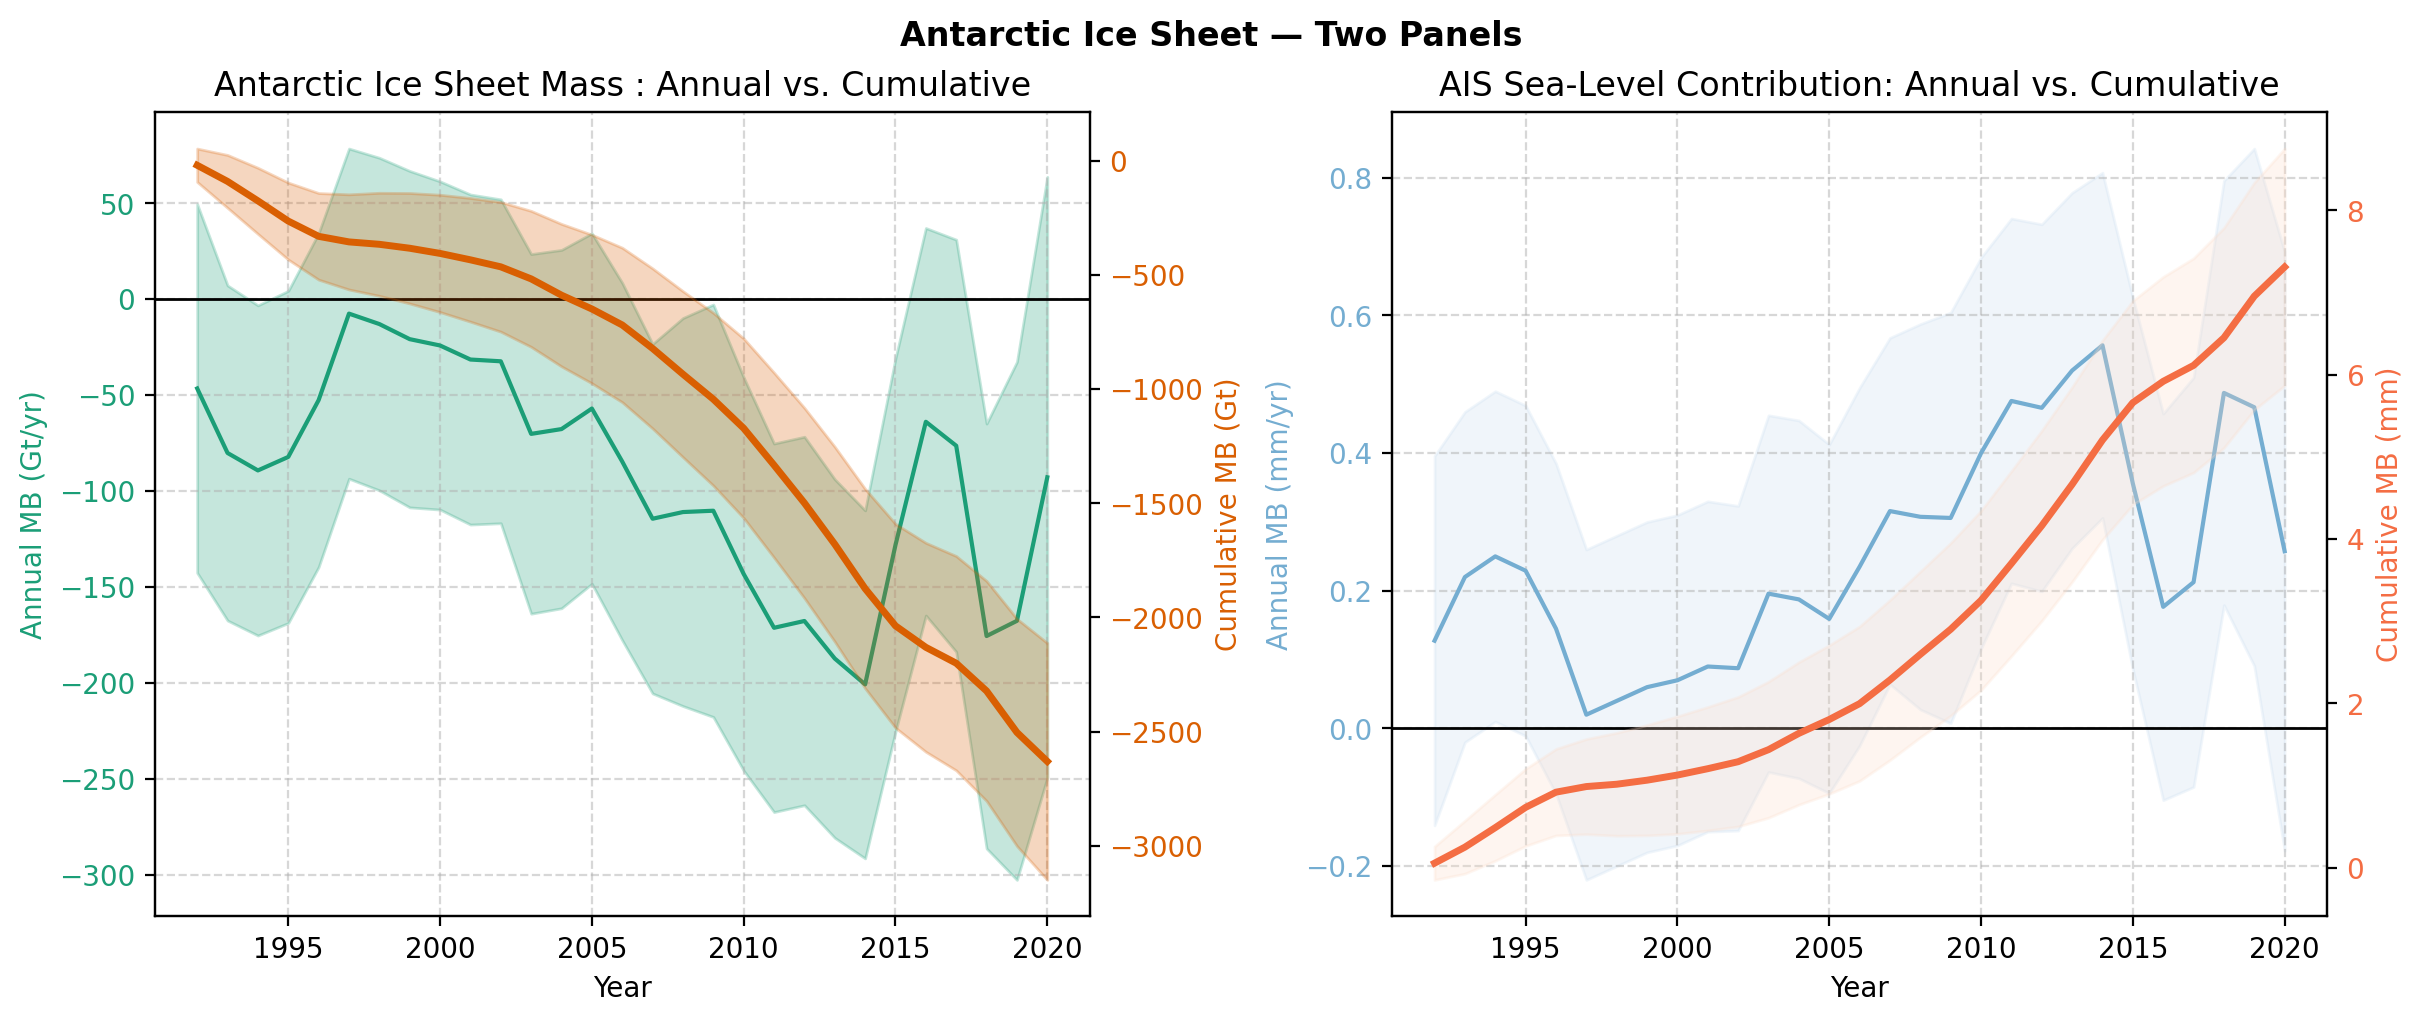

In [53]:
%config InlineBackend.figure_format = 'retina'
# === ANTARCTIC ICE SHEET — 2 SUBPLOTS ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# ------------ Antarctic #1 ------------
ax = axes[0]                     # <- use the left subplot
ax1 = ax                         # <- keep your original variable name
# Annual line + shaded CI
ax1.plot(AIS_mass['Year'], AIS_mass['AIS Annual MB Gt/yr'],
         color='#1b9e77', label='Annual MB (Gt/yr)')
ax1.fill_between(
    AIS_mass["Year"],
    annual - annual_uncertainty,
    annual + annual_uncertainty,
    color='#1b9e77', alpha=0.25, label="Annual ±95% CI"
)
ax1.set_ylabel('Annual MB (Gt/yr)', color='#1b9e77')
ax1.tick_params(axis='y', labelcolor='#1b9e77')

# Cumulative line on twin axis
ax2 = ax1.twinx()
ax2.plot(AIS_mass['Year'], AIS_mass['AIS Cumulative MB Gt'],
         color="#d95f02", linewidth=2.5, label='Cumulative MB (Gt)')
ax2.set_ylabel('Cumulative MB (Gt)', color="#d95f02")
ax2.tick_params(axis='y', labelcolor="#d95f02")
ax2.fill_between(
    AIS_mass["Year"],
    cumulative - cumulative_uncertainty,
    cumulative + cumulative_uncertainty,
    color='#d95f02', alpha=0.25, label="Cumulative ±95% CI"
)

# Shared formatting
ax1.set_xlabel('Year')
ax1.axhline(0, color='black', linewidth=1)
ax1.grid(linestyle='--', alpha=0.5)
ax1.set_title('Antarctic Ice Sheet Mass : Annual vs. Cumulative', fontsize=12)

# ------------ Antarctic #2 ------------
ax = axes[1]                     # <- use the right subplot
ax1 = ax                         # <- reuse the same naming pattern safely per panel
# Annual line + shaded CI (mm/yr)
ax1.plot(AIS_mass['Year'], AIS_mass['AIS Annual MB mm/yr'],
         color='#74add1', label='AIS Annual MB (mm/yr)')
ax1.fill_between(
    AIS_mass["Year"],
    annual2 - annual2_uncertainty,
    annual2 + annual2_uncertainty,
    color='#c6dbef', alpha=0.25, label="Annual MB Uncertainty"
)
ax1.set_ylabel('Annual MB (mm/yr)', color='#74add1')
ax1.tick_params(axis='y', labelcolor='#74add1')

# Cumulative line on twin axis (mm)
ax2 = ax1.twinx()
ax2.plot(AIS_mass['Year'], AIS_mass['AIS Cumulative MB mm'],
         color="#f46d43", linewidth=2.5, label='AIS Cumulative MB (mm)')
ax2.set_ylabel('Cumulative MB (mm)', color="#f46d43")
ax2.tick_params(axis='y', labelcolor="#f46d43")
ax2.fill_between(
    AIS_mass["Year"],
    cumulative2 - cumulative2_uncertainty,
    cumulative2 + cumulative2_uncertainty,
    color='#fddbc7', alpha=0.25, label="Cumulative ±95% CI"
)

# Shared formatting
ax1.set_xlabel('Year')
ax1.axhline(0, color='black', linewidth=1)
ax1.grid(linestyle='--', alpha=0.5)
ax1.set_title('AIS Sea-Level Contribution: Annual vs. Cumulative', fontsize=12)

# Single figure-level title + caption
fig.suptitle("Antarctic Ice Sheet — Two Panels", fontweight="bold")


plt.show()


**Figure 3.** Antarctic Ice Sheet mass balance plotted as annual and cumulative changes. The left panel shows changes in mass balance in gigatonnes (Gt/yr), while the right panel shows changes to global sea level demonstrating long-term trends in ice loss.

In [55]:
GRIS_mass

,Year,GrIS Annual MB Gt/yr,GrIS Annual MB Uncertainty Gt/yr,GrIS Cumulative MB Gt,GrIS Cumulative MB Uncertainty Gt,GrIS Annual MB mm/yr,GrIS Annual MB Uncertainty mm/yr,GrIS Cumulative MB mm,GrIS Cumulative MB Uncertainty mm
0,1992,-7.766700,56.400000,-4.206942,39.684258,0.020000,-0.160000,0.011667,-0.110833
1,1993,-24.366700,56.433300,-20.965275,69.731475,0.070000,-0.160000,0.058333,-0.194167
2,1994,-106.266700,56.400000,-89.694442,89.792283,0.300000,-0.160000,0.249167,-0.250000
3,1995,-45.143100,77.502300,-162.852500,112.877650,0.130000,-0.220000,0.454167,-0.314167
4,1996,7.965500,78.517400,-179.228450,137.298200,-0.020000,-0.220000,0.498333,-0.380000
5,1997,-4.680000,80.155300,-178.112600,158.632833,0.010000,-0.220000,0.495000,-0.440000
6,1998,-54.451700,80.167000,-209.752300,177.755958,0.150000,-0.220000,0.582500,-0.493333
7,1999,-74.371400,79.762600,-274.993817,194.920300,0.210000,-0.220000,0.764167,-0.540833
8,2000,-29.463200,78.742400,-325.039883,210.410267,0.080000,-0.220000,0.903333,-0.585000
9,2001,-76.837200,80.601600,-380.164017,225.020083,0.210000,-0.220000,1.055833,-0.625000


In [54]:
GRIS_massannual = GRIS_mass['GrIS Annual MB Gt/yr']
GRIS_massannual_uncertainty = GRIS_mass['GrIS Annual MB Uncertainty Gt/yr']
GRIS_masscumulative = GRIS_mass["GrIS Cumulative MB Gt"]
GRIS_masscumulative_uncertainty = GRIS_mass["GrIS Cumulative MB Uncertainty Gt"]

GRIS_annual2 = GRIS_mass['GrIS Annual MB mm/yr']
GRIS_annual2_uncertainty = GRIS_mass['GrIS Annual MB Uncertainty mm/yr']
GRIS_cumulative2 = GRIS_mass["GrIS Cumulative MB mm"]
GRIS_cumulative2_uncertainty =GRIS_mass['GrIS Cumulative MB Uncertainty mm']

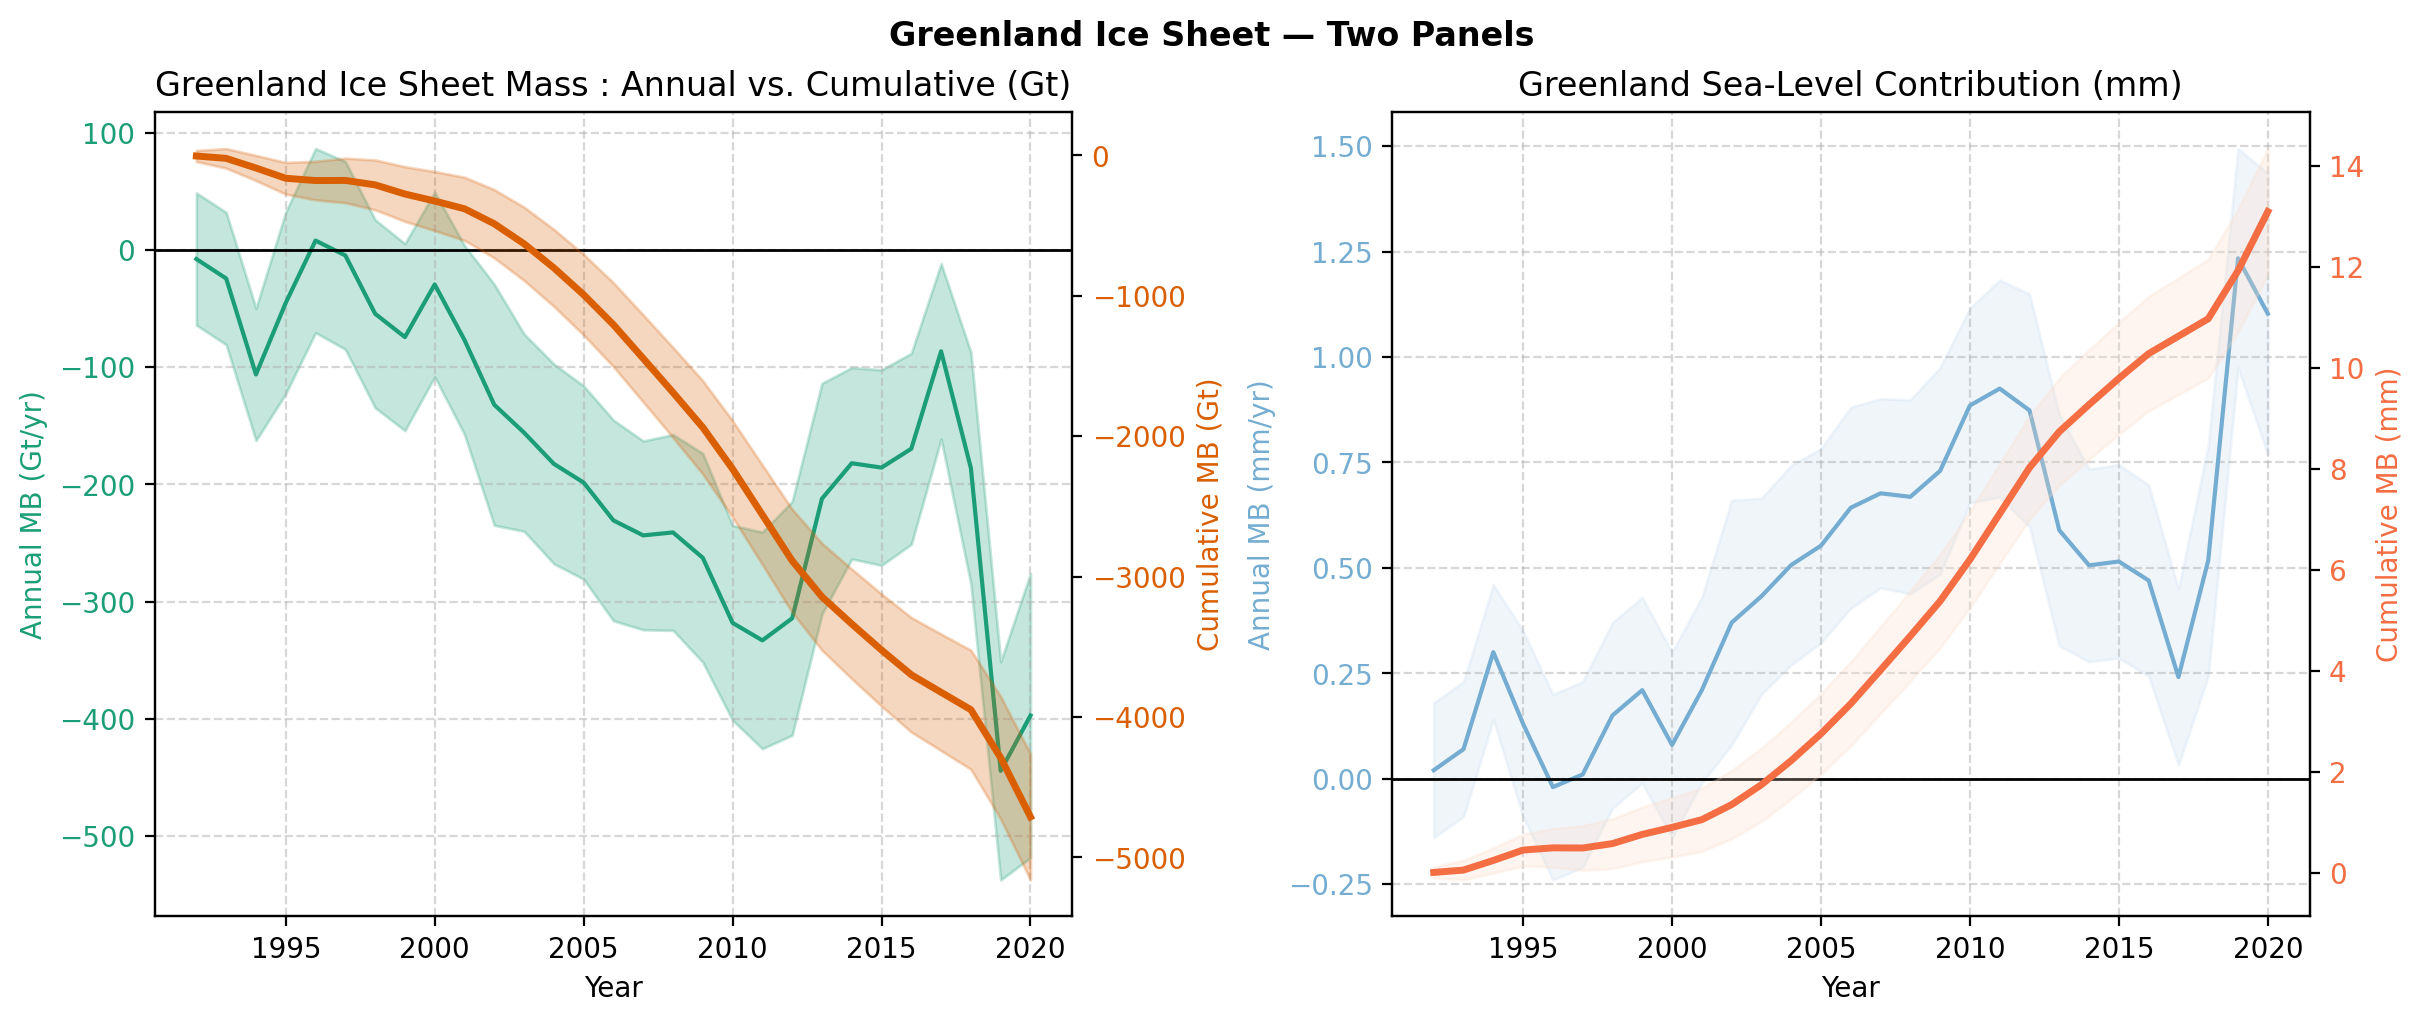

In [56]:
%config InlineBackend.figure_format = 'retina'
# === GREENLAND ICE SHEET — 2 SUBPLOTS ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# ------------ Greenland #1 ------------
ax = axes[0]
ax1 = ax
ax1.plot(GRIS_mass['Year'], GRIS_mass['GrIS Annual MB Gt/yr'],
         color='#1b9e77', label='Annual MB (Gt/yr)')
ax1.fill_between(
   GRIS_mass["Year"],
    GRIS_massannual - GRIS_massannual_uncertainty,
    GRIS_massannual + GRIS_massannual_uncertainty,
    color='#1b9e77', alpha=0.25, label="Annual ±95% CI"
)
ax1.set_ylabel('Annual MB (Gt/yr)', color='#1b9e77')
ax1.tick_params(axis='y', labelcolor='#1b9e77')

# Cumulative line
ax2 = ax1.twinx()
ax2.plot(GRIS_mass['Year'],GRIS_mass['GrIS Cumulative MB Gt'],
         color="#d95f02", linewidth=2.5, label='Cumulative MB (Gt)')
ax2.set_ylabel('Cumulative MB (Gt)', color='#d95f02')
ax2.tick_params(axis='y', labelcolor="#d95f02")
ax2.fill_between(
   GRIS_mass["Year"],
    GRIS_masscumulative - GRIS_masscumulative_uncertainty,
    GRIS_masscumulative + GRIS_masscumulative_uncertainty,
    color='#d95f02', alpha=0.25, label="Cumulative ±95% CI"
)

# Shared formatting
ax1.set_xlabel('Year')
ax1.axhline(0, color='black', linewidth=1)
ax1.grid(linestyle='--', alpha=0.5)
ax1.set_title('Greenland Ice Sheet Mass : Annual vs. Cumulative (Gt)', fontsize=12)

# ------------ Greenland #2 ------------
ax = axes[1]
ax1 = ax
ax1.plot(GRIS_mass['Year'], GRIS_mass['GrIS Annual MB mm/yr'],
         color='#74add1', label='Annual MB (mm/yr)')
ax1.fill_between(
   GRIS_mass["Year"],
    GRIS_annual2 - GRIS_annual2_uncertainty,
    GRIS_annual2 + GRIS_annual2_uncertainty,
    color='#c6dbef', alpha=0.25, label="Annual MB Uncertainty"
)
ax1.set_ylabel('Annual MB (mm/yr)', color='#74add1')
ax1.tick_params(axis='y', labelcolor='#74add1')

# Cumulative line
ax2 = ax1.twinx()
ax2.plot(GRIS_mass['Year'], GRIS_mass['GrIS Cumulative MB mm'],
         color="#f46d43", linewidth=2.5, label='Cumulative MB (mm)')
ax2.set_ylabel('Cumulative MB (mm)', color='#f46d43')
ax2.tick_params(axis='y', labelcolor="#f46d43")
ax2.fill_between(
    GRIS_mass["Year"],
    GRIS_cumulative2 - GRIS_cumulative2_uncertainty,
    GRIS_cumulative2 + GRIS_cumulative2_uncertainty,
    color='#fddbc7', alpha=0.25, label="Cumulative ±95% CI"
)

ax1.set_xlabel('Year')
ax1.axhline(0, color='black', linewidth=1)
ax1.grid(linestyle='--', alpha=0.5)
ax1.set_title('Greenland Sea-Level Contribution (mm)', fontsize=12)

fig.suptitle("Greenland Ice Sheet — Two Panels", fontweight="bold")


plt.show()


**Figure 4.** Greenland Ice Sheet mass balance plotted as annual and cumulative changes. The left panel presents annual melt rates in gigatonnes per year, and the right panel shows cumulative mass loss, reflecting sustained melting showing sea level changes recent decades.

## 🌎 Total Ice Sheet Contribution to Sea Level

By adding Greenland and Antarctic data together, we can see the **global effect** of melting land ice.

When both regions lose ice, global sea level rises — even if one region temporarily stabilizes.  
This combined perspective shows how the planet’s “frozen water budget” affects everyone, everywhere.


In [57]:
GRIS_AIS_comb_mass

,Year,AIS + GrIS Annual MB Gt/yr,AIS + GrIS Annual MB Uncertainty Gt/yr,AIS + GrIS Cumulative MB Gt,AIS + GrIS Cumulative MB Uncertainty Gt,AIS + GrIS Annual MB mm/yr,AIS + GrIS Annual MB Uncertainty mm/yr,AIS + GrIS Cumulative MB mm,AIS + GrIS Cumulative MB Uncertainty mm
0,1992,-54.320592,111.574767,-23.472117,83.256150,0.153333,-0.311667,0.065000,-0.230833
1,1993,-104.549400,103.968900,-110.951542,135.223125,0.290000,-0.290000,0.308333,-0.374167
2,1994,-195.541300,102.868500,-264.788258,170.366292,0.540000,-0.290000,0.735000,-0.473333
3,1995,-127.387900,116.180308,-426.645525,202.923067,0.353333,-0.320000,1.185000,-0.564167
4,1996,-44.660600,117.177250,-509.823775,234.140050,0.125000,-0.330000,1.416667,-0.650000
5,1997,-12.232400,117.574400,-533.085692,261.941483,0.030000,-0.330000,1.481667,-0.726667
6,1998,-67.440800,118.053400,-575.222642,287.240583,0.190000,-0.330000,1.597500,-0.798333
7,1999,-95.234300,118.523600,-657.718258,310.661283,0.260000,-0.330000,1.827500,-0.863333
8,2000,-53.625500,116.251500,-730.414442,332.080383,0.150000,-0.320000,2.029167,-0.922500
9,2001,-108.317400,117.869700,-813.664733,352.135025,0.300000,-0.330000,2.260000,-0.978333


In [58]:
GRIS_AIS_comb_massannual = GRIS_AIS_comb_mass['AIS + GrIS Annual MB Gt/yr']
GRIS_AIS_comb_massannual_uncertainty = GRIS_AIS_comb_mass['AIS + GrIS Annual MB Uncertainty Gt/yr']
GRIS_AIS_comb_masscumulative = GRIS_AIS_comb_mass["AIS + GrIS Cumulative MB Gt"]
GRIS_AIS_comb_masscumulative_uncertainty = GRIS_AIS_comb_mass["AIS + GrIS Cumulative MB Uncertainty Gt"]

GRIS_AIS_comb_massannual2 = GRIS_AIS_comb_mass['AIS + GrIS Annual MB mm/yr']
GRIS_AIS_comb_massannual2_uncertainty = GRIS_AIS_comb_mass['AIS + GrIS Annual MB Uncertainty mm/yr']
GRIS_AIS_comb_masscumulative2 = GRIS_AIS_comb_mass["AIS + GrIS Cumulative MB mm"]
GRIS_AIS_comb_masscumulative2_uncertainty =GRIS_AIS_comb_mass['AIS + GrIS Cumulative MB Uncertainty mm']

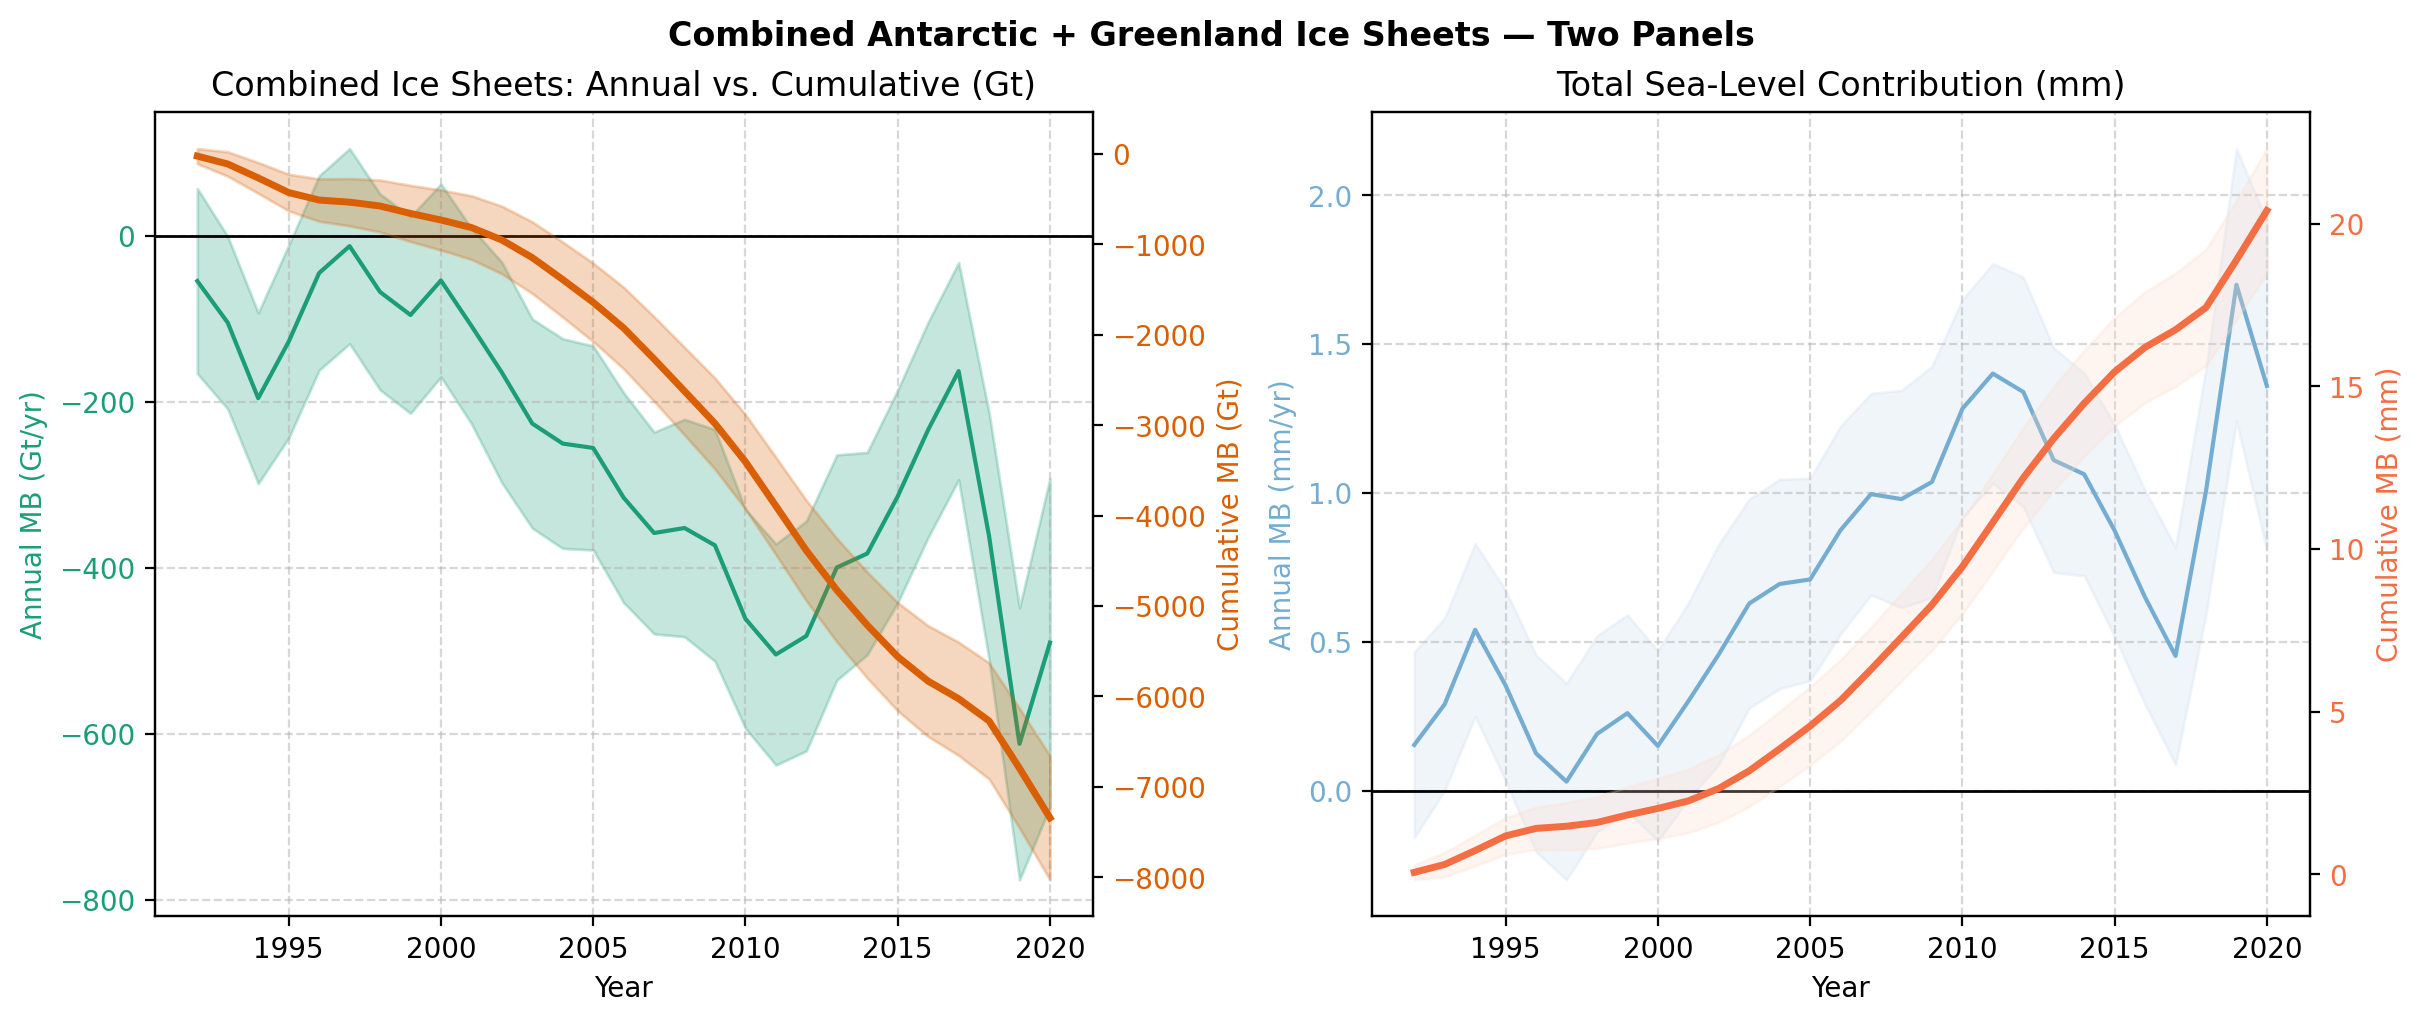

In [59]:
%config InlineBackend.figure_format = 'retina'
# === COMBINED AIS + GrIS — 2 SUBPLOTS ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# ------------ Combined #1 ------------
ax = axes[0]
ax1 = ax
ax1.plot(GRIS_AIS_comb_mass['Year'], GRIS_AIS_comb_mass['AIS + GrIS Annual MB Gt/yr'],
         color='#1b9e77', label='Total Annual MB (Gt/yr)')
ax1.fill_between(
    GRIS_AIS_comb_mass["Year"],
    GRIS_AIS_comb_massannual - GRIS_AIS_comb_massannual_uncertainty,
   GRIS_AIS_comb_massannual + GRIS_AIS_comb_massannual_uncertainty,
    color='#1b9e77', alpha=0.25, label="Annual ±95% CI"
)
ax1.set_ylabel('Annual MB (Gt/yr)', color='#1b9e77')
ax1.tick_params(axis='y', labelcolor='#1b9e77')

ax2 = ax1.twinx()
ax2.plot(GRIS_AIS_comb_mass['Year'], GRIS_AIS_comb_mass['AIS + GrIS Cumulative MB Gt'],
         color="#d95f02", linewidth=2.5, label='Cumulative MB (Gt)')
ax2.set_ylabel('Cumulative MB (Gt)', color='#d95f02')
ax2.tick_params(axis='y', labelcolor="#d95f02")
ax2.fill_between(
   GRIS_AIS_comb_mass["Year"],
    GRIS_AIS_comb_masscumulative - GRIS_AIS_comb_masscumulative_uncertainty,
   GRIS_AIS_comb_masscumulative + GRIS_AIS_comb_masscumulative_uncertainty,
    color='#d95f02', alpha=0.25, label="Cumulative ±95% CI"
)

ax1.set_xlabel('Year')
ax1.axhline(0, color='black', linewidth=1)
ax1.grid(linestyle='--', alpha=0.5)
ax1.set_title('Combined Ice Sheets: Annual vs. Cumulative (Gt)', fontsize=12)

# ------------ Combined #2 ------------
ax = axes[1]
ax1 = ax
ax1.plot(GRIS_AIS_comb_mass['Year'], GRIS_AIS_comb_mass['AIS + GrIS Annual MB mm/yr'],
         color='#74add1', label='Total Annual MB (mm/yr)')
ax1.fill_between(
    GRIS_AIS_comb_mass["Year"],
    GRIS_AIS_comb_massannual2 - GRIS_AIS_comb_massannual2_uncertainty,
   GRIS_AIS_comb_massannual2 + GRIS_AIS_comb_massannual2_uncertainty,
    color='#c6dbef', alpha=0.25, label="Annual MB Uncertainty"
)
ax1.set_ylabel('Annual MB (mm/yr)', color='#74add1')
ax1.tick_params(axis='y', labelcolor='#74add1')

ax2 = ax1.twinx()
ax2.plot(GRIS_AIS_comb_mass['Year'], GRIS_AIS_comb_mass['AIS + GrIS Cumulative MB mm'],
         color="#f46d43", linewidth=2.5, label='Cumulative MB (mm)')
ax2.set_ylabel('Cumulative MB (mm)', color='#f46d43')
ax2.tick_params(axis='y', labelcolor="#f46d43")
ax2.fill_between(
   GRIS_AIS_comb_mass["Year"],
    GRIS_AIS_comb_masscumulative2 - GRIS_AIS_comb_masscumulative2_uncertainty ,
    GRIS_AIS_comb_masscumulative2 + GRIS_AIS_comb_masscumulative2_uncertainty ,
    color='#fddbc7', alpha=0.25, label="Cumulative ±95% CI"
)

ax1.set_xlabel('Year')
ax1.axhline(0, color='black', linewidth=1)
ax1.grid(linestyle='--', alpha=0.5)
ax1.set_title('Total Sea-Level Contribution (mm)', fontsize=12)

fig.suptitle("Combined Antarctic + Greenland Ice Sheets — Two Panels", fontweight="bold")

plt.show()

**Figure 5.** Combined mass balance of the Antarctic and Greenland Ice Sheets. These plots show the total mass lass and  total contribution of land ice loss to global sea-level rise, emphasizing the combined impact of both polar regions.


### <font color=red> Arctic Amplification and the Key Feedback Driving Sea Ice Loss

**Arctic amplification** refers to the phenomenon where the **Arctic region warms at a faster rate than the global average**. Over the past few decades, surface air temperatures in the Arctic have risen **about two to four times faster** than the global mean.

#### Key Feedback: The Ice–Albedo Feedback

The **ice–albedo feedback** is the main driver of Arctic amplification and sea ice loss.

- **Albedo** is the measure of how much sunlight a surface reflects.  
- **Sea ice** has a **high albedo**, meaning it reflects most incoming solar radiation.  
- When sea ice **melts**, it exposes **darker ocean water**, which has a **low albedo** and absorbs more solar energy.  
- This **additional absorbed heat** warms the ocean and **accelerates further melting**, creating a **positive feedback loop**.

#### Summary of the Feedback Process
1. Rising temperatures cause sea ice to melt.  
2. Darker ocean water absorbs more solar energy.  
3. Ocean warming leads to more sea ice melt.  
4. The cycle repeats, amplifying regional and global warming.

**In essence:** Arctic amplification is both a result and a driver of the rapid decline in Arctic sea ice, with the **ice–albedo feedback** serving as the central mechanism behind this enhanced warming.


(Nature: role of sea ice in present and future Acritic amplfication (2025)

In [63]:
seaice_conc

<xarray.Dataset>
Dimensions:  (time: 505, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-09-01
Data variables:
    icec     (time, lat, lon) float32 dask.array<chunksize=(32, 90, 180), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.5
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    version:        Version 2.1

In [64]:
def North_Polar(array, vmin, vmax, cmap):
    fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection': ccrs.NorthPolarStereo()})

    array.plot.pcolormesh(
        ax=ax,
        x='lon', y='lat',
        transform=ccrs.PlateCarree(),     
        vmin=vmin, vmax=vmax,
        cmap=cmap,
        shading='auto',
        infer_intervals=False,            
        add_colorbar=True
    )

    ax.add_feature(cfeature.LAND,  facecolor='black', edgecolor='black', zorder=3)
    ax.add_feature(cfeature.OCEAN, facecolor='white', edgecolor='white', zorder=2)
    ax.coastlines(color='white', linewidth=0.4, zorder=4)

    ax.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + 0.5)
    ax.set_boundary(circle, transform=ax.transAxes)
    return fig, ax


In [83]:
def South_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

##  <font color=red> Let's Define Some Important Terms Relating to the Cryosphere:

**Sea ice concentration:**  
The fraction (or percentage) of a given area of ocean covered by sea ice.  
It is usually expressed in **percent (%)** or as a **fraction (0–1)**.  
For example, a concentration of 0.8 means 80% of that area is ice-covered.

**Sea ice extent:**  
The total area of ocean where the sea ice concentration exceeds a chosen threshold, commonly **15%**.  
It is expressed in **square kilometers (km²)** or **million km²**.  
Extent is often used to compare total ice coverage between years or seasons.

**Sea ice thickness:**  
The vertical distance between the ice surface and its base (the ocean interface).  
It is measured in **meters (m)**.  
Thickness, together with concentration, determines the total **sea ice volume**.

(IPCC AR6 WGI, 2021)
(NSDIC, Sea Ice)

##  <font color=red> Does sea ice melt contribute to global sea-level rise?

Melting **sea ice does not directly raise global sea level**, because it already floats in the ocean.

The principle behind this is **Archimedes’ principle**: floating ice displaces its own weight in water.  
When it melts, the volume of water produced is equal to the volume of water that was already displaced, so the total sea level remains unchanged.

However, melting **land ice** (such as glaciers and ice sheets) does contribute to sea-level rise because it adds new water to the ocean that was previously stored on land.

(NSDIC)

## 🧭 Sea Ice Extent: The Planet’s Seasonal Breath

Sea ice grows and shrinks each year with the seasons — expanding in winter and melting back in summer.  
This rhythm acts like **Earth’s polar heartbeat**, helping regulate the planet’s temperature.

Here we show:
- The **Arctic**  and **Antarctic** .  
- **Winter (DJF)** and **Summer (JJA)** averages.  

🧠 *Look for patterns:*  
- Does one pole have more sea ice overall?  
- Are the summer and winter differences larger in the north or south?  
- Why might that be?


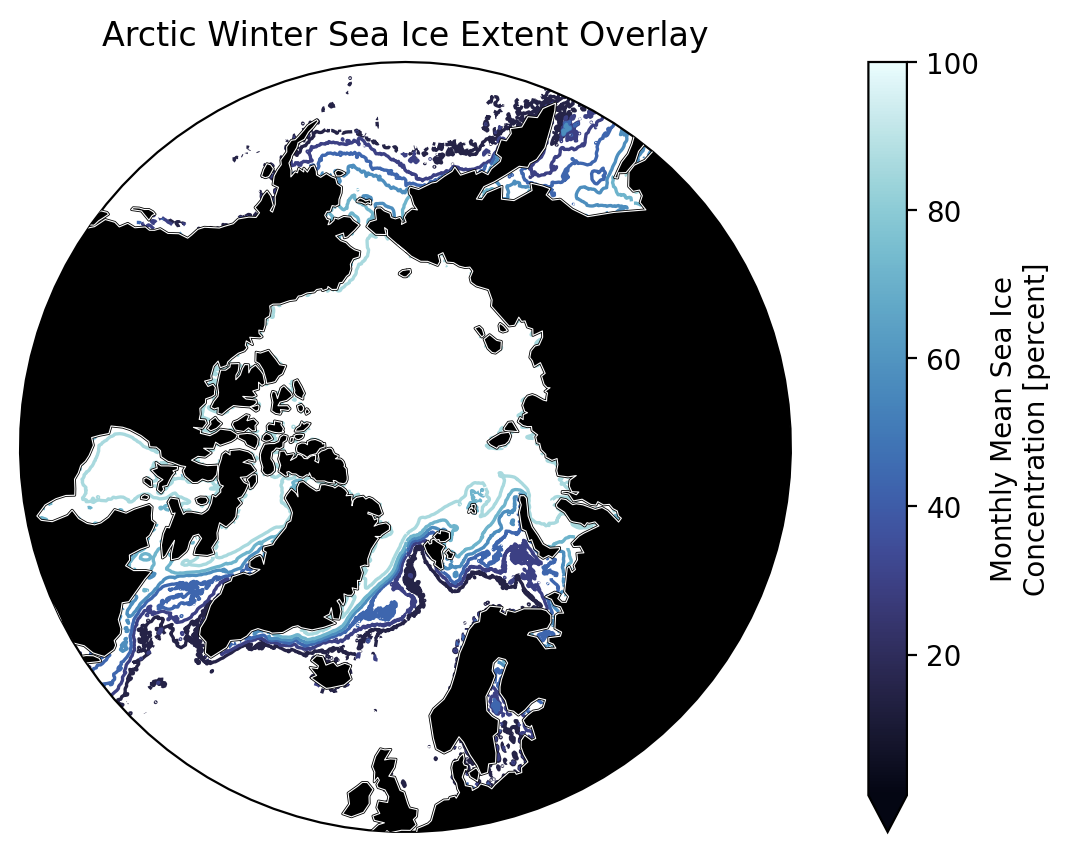

In [86]:
%config InlineBackend.figure_format = 'retina'
da = (seaice_conc["icec"]
      .groupby("time.season").mean("time")   # seasonal mean from monthly
      .sel(season="DJF")
      .squeeze(drop=True))                    # remove leftover  dims


# 2) Plot the field
North_Polar(da, vmin=1, vmax=100, cmap= cmocean.cm.ice)

# 3) Overlay the 15% extent 
plt.contour(da["lon"], da["lat"], da,
cmap= cmocean.cm.ice, linewidths=1.2,
transform=ccrs.PlateCarree())

plt.title("Arctic Winter Sea Ice Extent Overlay")
plt.show()


**Figure 6.** Arctic sea-ice extent during the winter season (DJF).  
This map shows the average area of ocean covered by sea ice in the Northern Hemisphere’s coldest months.  
The contour line marks the 15% concentration boundary, commonly used to define the ice edge.


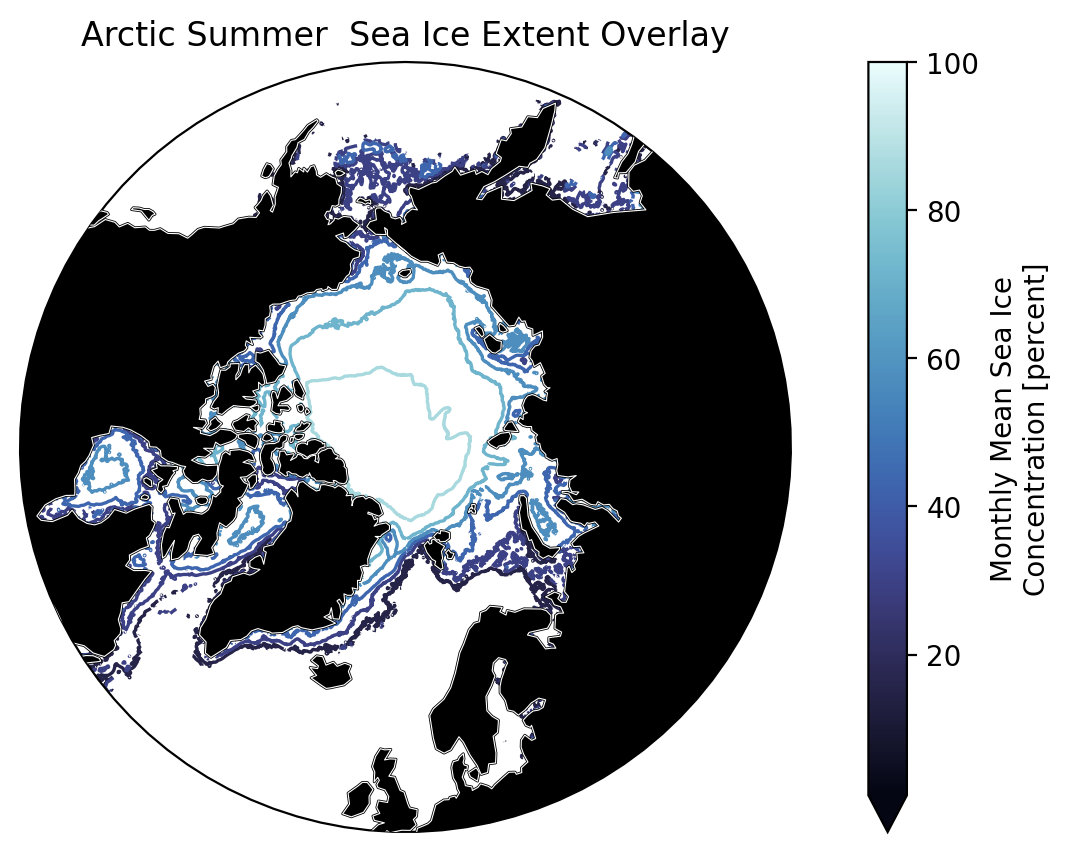

In [87]:
%config InlineBackend.figure_format = 'retina'
da2 = (seaice_conc["icec"]
      .groupby("time.season").mean("time")   # seasonal mean from monthly
      .sel(season="JJA")
      .squeeze(drop=True))                    # remove leftover  dims


# 2) Plot the field
North_Polar(da2, vmin=1, vmax=100, cmap=cmocean.cm.ice)

# 3) Overlay the 15% extent
plt.contour(da2["lon"], da2["lat"], da2,
cmap=cmocean.cm.ice, linewidths=1.2,
transform=ccrs.PlateCarree())

plt.title("Arctic Summer  Sea Ice Extent Overlay")
plt.show()



**Figure 7.** Arctic sea-ice extent during the summer season (JJA).  
The summer minimum shows the retreat of sea ice as temperatures rise, revealing how much of the Arctic Ocean becomes ice-free each year.




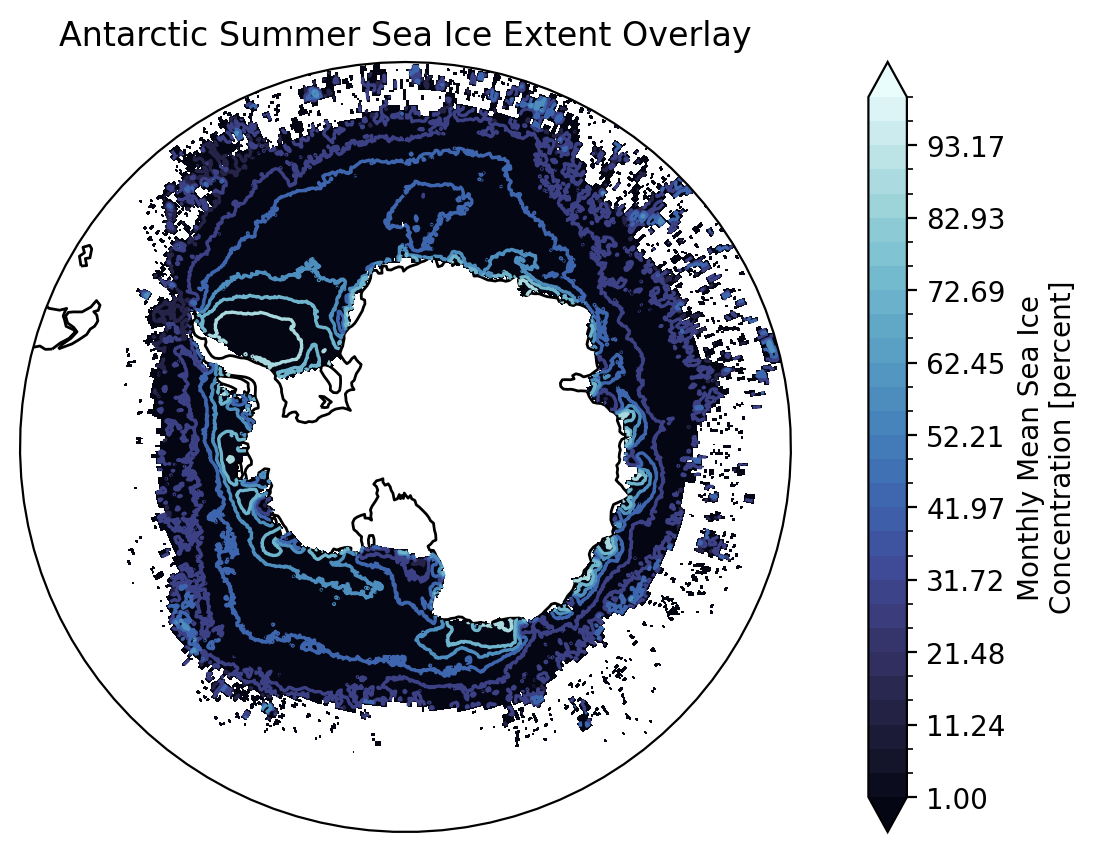

In [88]:
%config InlineBackend.figure_format = 'retina'
da2 = (seaice_conc["icec"]
      .groupby("time.season").mean("time")   # seasonal mean from monthly
      .sel(season="DJF")
      .squeeze(drop=True))                    # remove leftover  dims


# 2) Plot the field
South_Polar(da2, vmin=1, vmax=100, cmap=cmocean.cm.ice)

# 3) Overlay the 15% extent 
plt.contour(da2["lon"], da2["lat"], da2,
cmap=cmocean.cm.ice, linewidths=1.2,
transform=ccrs.PlateCarree())

plt.title("Antarctic Summer Sea Ice Extent Overlay")
plt.show()


**Figure 8.** Antarctic sea-ice extent during the winter season (DJF).  
This panel displays the broad expansion of sea ice around Antarctica in winter, when the surrounding Southern Ocean freezes and extends far from the continent.



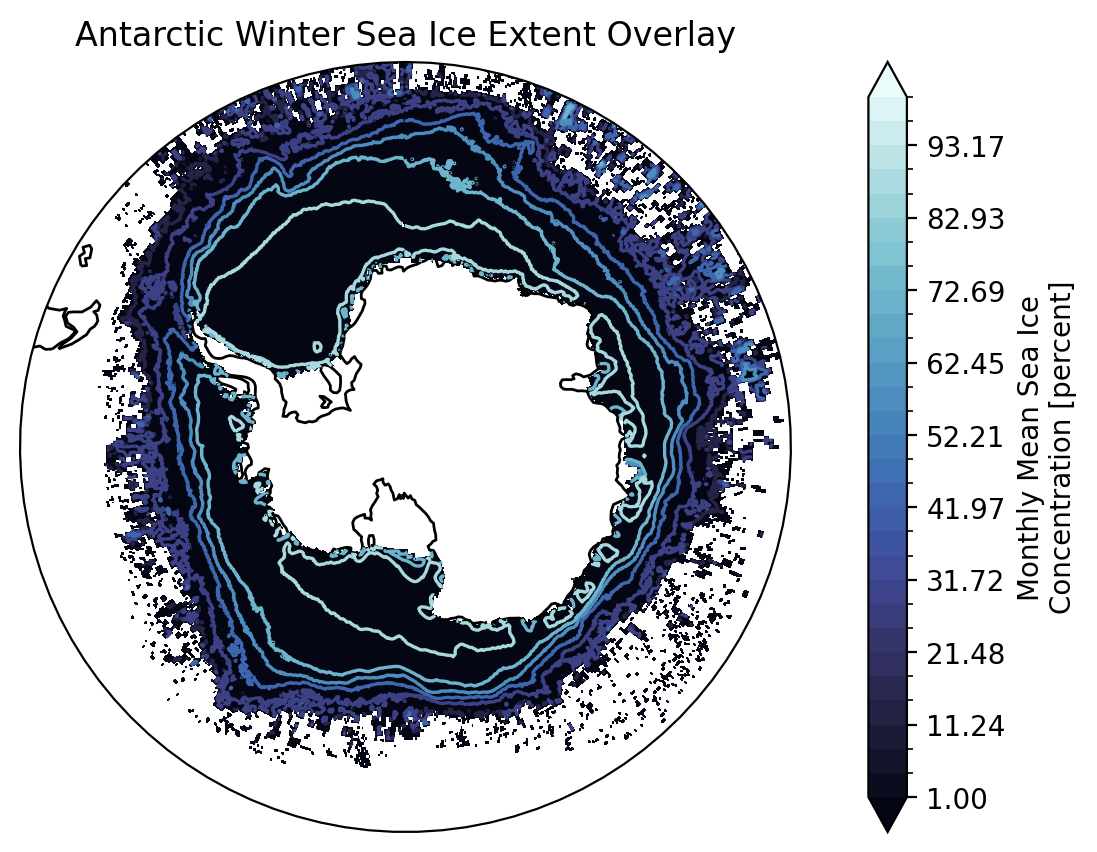

In [89]:
%config InlineBackend.figure_format = 'retina'
da = (seaice_conc["icec"]
      .groupby("time.season").mean("time")   # seasonal mean from monthly
      .sel(season="JJA")
      .squeeze(drop=True))                    # remove leftover dims


# 2) Plot the field
South_Polar(da, vmin=1, vmax=100, cmap= cmocean.cm.ice)

# 3) Overlay the 15% extent 
plt.contour(da["lon"], da["lat"], da,
cmap= cmocean.cm.ice, linewidths=1.2,
transform=ccrs.PlateCarree())

plt.title("Antarctic Winter Sea Ice Extent Overlay")
plt.show()


**Figure 8.** Antarctic sea-ice extent during the summer season (JJA).  
The summer minimum highlights how most Antarctic sea ice melts back each year, leaving a narrow band of ice along the coast.

## 📈 Tracking Change Through Time

Maps show *where* things are changing, but line charts show *how fast*.  
Below, we compare time series of sea-ice extent for both hemispheres to see whether the trends are steady, slowing, or accelerating.

🧩 *Try this:* Notice if the Arctic and Antarctic trends mirror each other — or behave in opposite ways.


In [3]:
SIC           = seaice_conc                # dataset with sea-ice concentration
SIC_VAR       = seaice_conc["icec"]        # ice concentration (0–100 %)
AREA_DSET     = seaice_cellarea            # dataset with grid-cell area (m^2)
AREA_VAR      = seaice_cellarea["cell_area"]  #  cell area (m^2)
LAT_NAME      = "lat"
LON_NAME      = "lon"
TIME_NAME     = "time"
ARCTIC_LATMIN = 50                         # (degrees North)
ANT_LATMAX    = -50 
# =========================
# CONFIG (your names)
# =========================
SIC           = seaice_conc                   # dataset with sea-ice concentration
SIC_VAR       = seaice_conc["icec"]           # DataArray: ice concentration (0–100 %)
AREA_DSET     = seaice_cellarea               # dataset with grid-cell area (m^2)
AREA_VAR      = seaice_cellarea["cell_area"]  # DataArray: cell area (m^2)
LAT_NAME      = "lat"
LON_NAME      = "lon"
TIME_NAME     = "time"
ANT_LATMAX    = -50                           # Antarctic domain: lat <= -50°

# =========================
# 1) Pull variables & ALIGN AREA
# =========================
sic  = SIC_VAR                                # e.g., dims (time, lat, lon)
area = AREA_VAR                               # e.g., dims (lat, lon)



# 2) Units & Antarctic mask

# Convert percent (0–100) -> fraction (0–1)
sic_frac = sic / 100.0

# Mask for the Arctic domain
arctic_mask = sic_frac[LAT_NAME] >= ARCTIC_LATMIN
sic_arctic  = sic_frac.where(arctic_mask)
area_arctic = area.where(arctic_mask)
# Mask for Antarctic domain (lat <= -50)
ant_mask   = sic_frac[LAT_NAME] <= ANT_LATMAX
sic_antar  = sic_frac.where(ant_mask)
area_antar = area.where(ant_mask)


# 3) Monthly SIE time series
#     SIE = sum( sic_frac * area ) over space
#     Convert to *million km^2* by dividing by 1e12 (m^2 -> million km^2)

sum_dims = [LAT_NAME, LON_NAME]
SIE_mkm2 = (sic_antar * area_antar).sum(dim=sum_dims, skipna=True) / 1e12
SIE_mkm2.name = "SIE (million km²)"

# =========================
# 4) 1982–2010 climatology and std (by calendar month)
# =========================
baseline    = SIE_mkm2.sel({TIME_NAME: slice("1982-01-01", "2010-12-31")})
clim_mean   = baseline.groupby(f"{TIME_NAME}.month").mean(TIME_NAME)
clim_std    = baseline.groupby(f"{TIME_NAME}.month").std(TIME_NAME)
clim_plus2  = clim_mean + 2.0 * clim_std
clim_minus2 = clim_mean - 2.0 * clim_std

# =========================
# 5) Annual cycles for specific years
# =========================
def annual_cycle_for_year(ts, year):
    sel = ts.sel({TIME_NAME: str(year)})
    return sel.groupby(f"{TIME_NAME}.month").mean(TIME_NAME)

ac_2012 = annual_cycle_for_year(SIE_mkm2, 2012)
ac_2020 = annual_cycle_for_year(SIE_mkm2, 2020)
ac_2021 = annual_cycle_for_year(SIE_mkm2, 2021)

# (Optional) replace numeric 1–12 with month names directly on the x-axis
months = np.arange(1, 13)
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

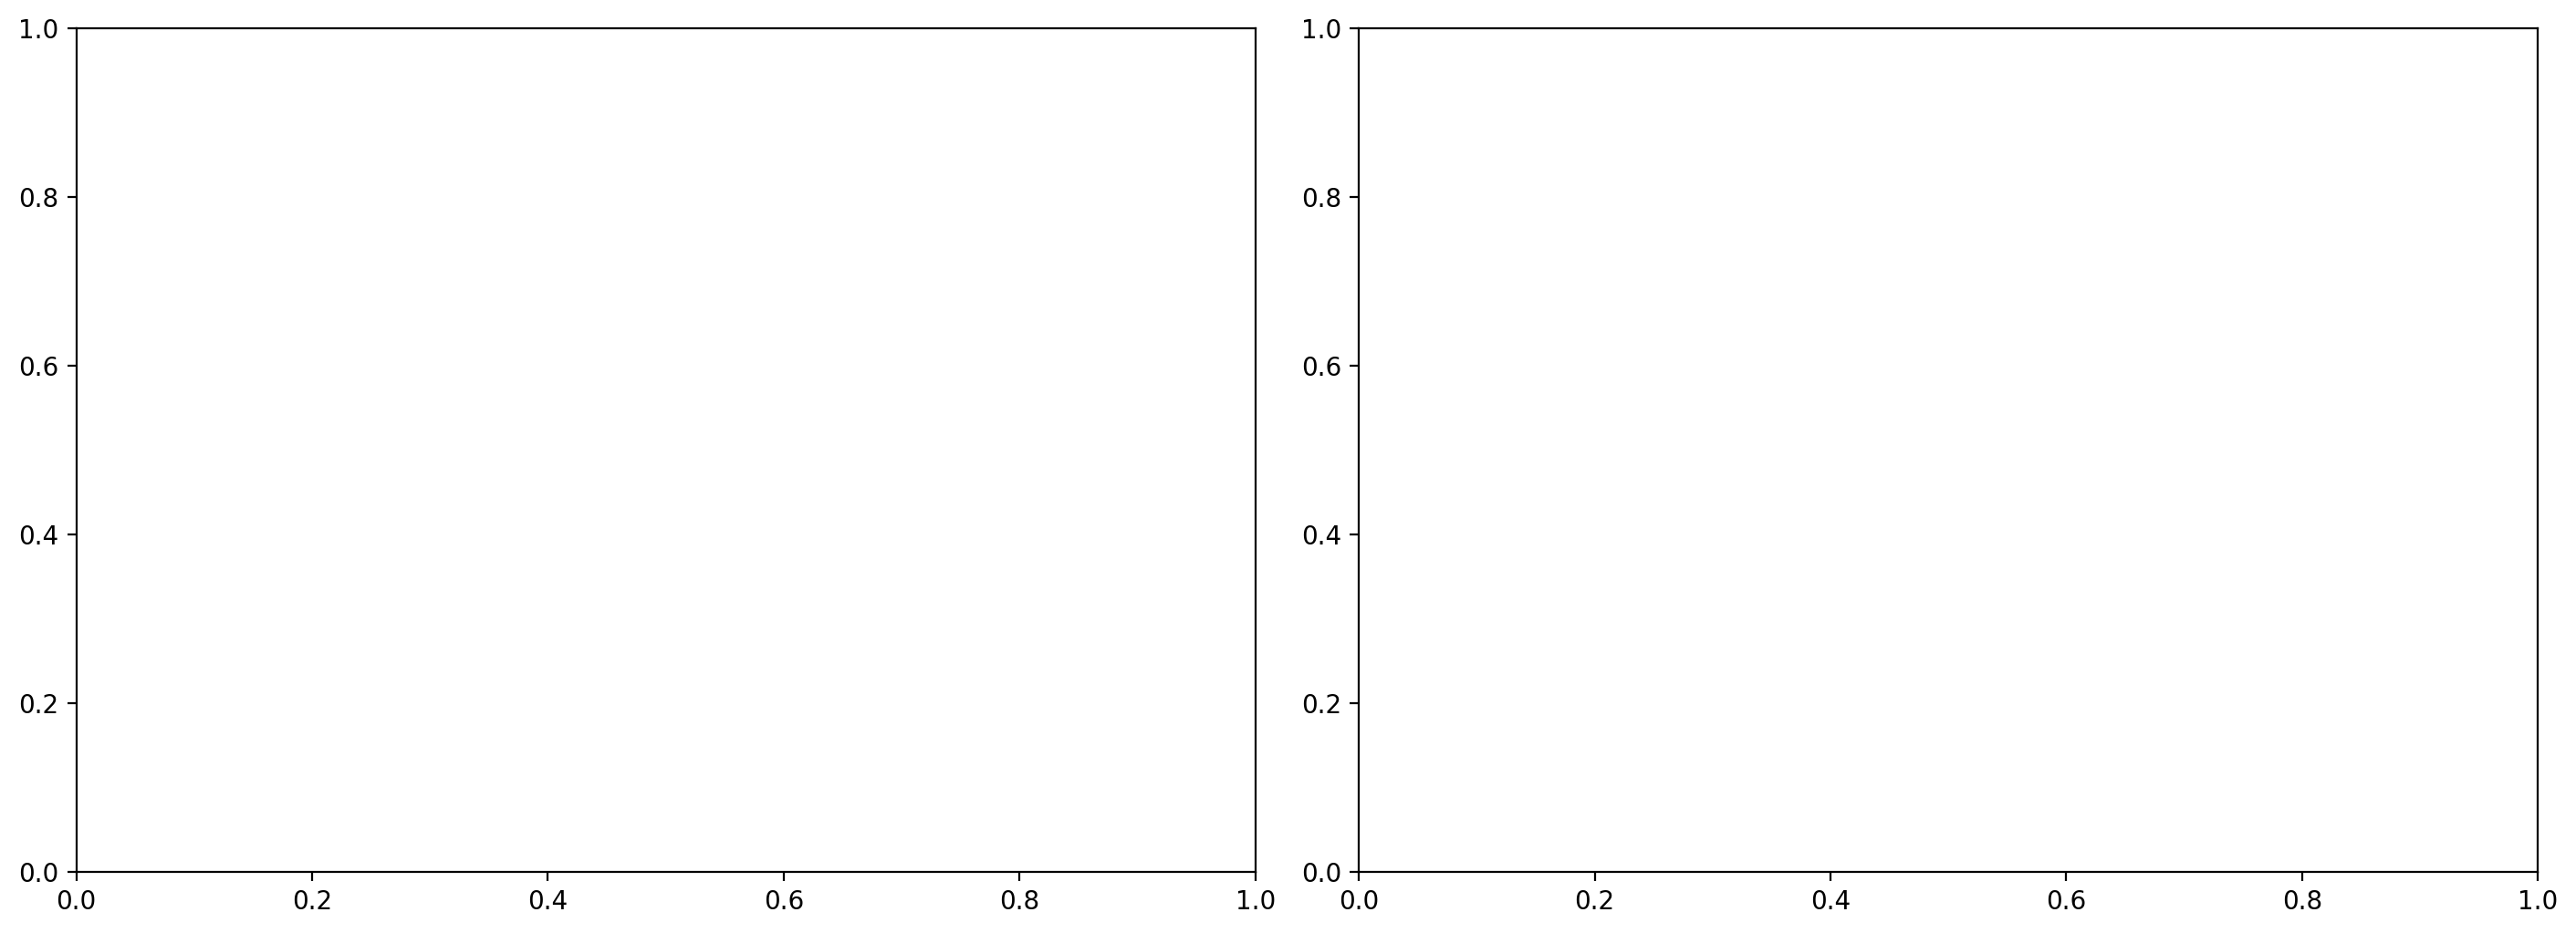

In [4]:
%config InlineBackend.figure_format = 'retina'
# === SEA ICE EXTENT LINE CHARTS — 2 SUBPLOTS ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# --- Line chart #1 ---
ax = axes[0]
# ⬇️ PASTE your FIRST sea-ice-extent *line chart* here.
# 1982–2010 mean (thick dashed)
ax.plot(months, clim_mean.groupby, linestyle="--", linewidth=3, color="k", label="1982–2010 mean")

# ±2σ fill (thin band)
ax.fill_between(months, clim_minus2.groupby, clim_plus2.groupby, color="lightblue", alpha=0.3, label="±2σ range")

# 2012 (thick red), 2020 & 2021
ax.plot(months, ac_2012.groupby, color="red", linewidth=3, label="2012")
ax.plot(months, ac_2020.groupby, color="purple", linewidth=2, label="2020")
ax.plot(months, ac_2021.groupby, color="orange", linewidth=2, label="2021")

# Axes
ax.set_xticks(months)
ax.set_xticklabels(month_labels)
ax.set_xlim(1, 12)
ax.set_ylabel("Arctic Sea Ice Extent (million km²)")
ax.grid(linestyle="--", alpha=0.4)
ax.legend(ncols=2, frameon=True)
ax.set_title("Arctic Sea Ice Extent — Monthly Climatology and Selected Years")
# ⬇️ PASTE your SECOND sea-ice-extent *line chart* here.
ax = axes[1]
# 1982–2010 mean (thick dashed)
ax.plot(months, clim_mean.groupby, linestyle="--", linewidth=3, color="k", label="1982–2010 mean")

# ±2σ fill band
ax.fill_between(months, clim_minus2.groupby, clim_plus2.groupby,
                color="gray", alpha=0.3, label="±2σ range")

# 2012 (thick red), 2020 & 2021
ax.plot(months, ac_2012.groupby, color="red", linewidth=3, label="2012")
ax.plot(months, ac_2020.groupby, color="tab:blue", linewidth=2, label="2020")
ax.plot(months, ac_2021.groupby, color="tab:green", linewidth=2, label="2021")

# Axes
ax.set_xticks(months)
ax.set_xticklabels(month_labels)
ax.set_xlim(1, 12)
ax.set_ylabel("Antarctic Sea Ice Extent (million km²)")
ax.grid(linestyle="--", alpha=0.4)
ax.legend(ncols=2, frameon=True)
ax.set_title("Antarctic Sea Ice Extent — Monthly Climatology and Selected Years")


fig.suptitle("Sea Ice Extent — Two Line Charts", fontweight="bold")
plt.show()


**Figure 9.**
Time series of sea-ice extent for the Arctic and Antarctic. The plots illustrate long-term trends and seasonal variations, showing the more pronounced decline in the Arctic compared to the relatively variable Antarctic pattern.

## <font color=red> How is Antarctic sea ice different from Arctic sea ice and why?

Antarctic and Arctic sea ice differ in both their physical characteristics and their seasonal patterns.

- **Seasonal Cycle:**  
  The **Arctic** is an ocean surrounded by continents, so sea ice can persist year-round in many areas. It reaches its maximum extent in **March** (end of Northern Hemisphere winter) and its minimum in **September** (end of summer).  
  The **Antarctic**, by contrast, is a continent surrounded by ocean. Sea ice there grows rapidly each winter and almost completely melts back each summer. It reaches its maximum extent in **September** and minimum in **February**.  

- **Thickness:**  
  Arctic sea ice tends to be **thicker**, often ranging from **2–4 meters** in older, multi-year ice.  
  Antarctic sea ice is generally **thinner**, averaging about **1 meter** or less, because it forms and melts annually.

- **Extent:**  
  The Arctic sea ice covers a smaller area but retains some ice throughout the year (around **10–15 million square kilometers** at maximum).  
  The Antarctic sea ice has a much larger seasonal range, expanding from about **3 million km² in summer** to over **18 million km² in winter**.

These differences result mainly from geography: the Arctic’s enclosed ocean retains ice longer, while the open Southern Ocean allows Antarctic ice to spread widely but melt back completely each year.

---

(NSIDC)


## <font color=red> What month has experienced the largest change in sea ice extent when comparing 2020 to the 1982–2010 average for the Arctic and Antarctic?

Based on our observations:
- In the **Arctic**, the largest decline in sea ice extent occurred during **September**, the end of the melt season, when the summer minimum reached record lows compared to the 1982–2010 average.  
- In the **Antarctic**, the largest decrease was observed during **February**, when the summer minimum extent showed a substantial reduction compared to the long-term mean.

## 🧊 Sea Ice Minimum vs. Maximum Months

Each pole has a seasonal rhythm(note that seasons are flipped in the southern hemisphere):
- **Minimum sea ice** usually happens at the end of summer.
- **Maximum sea ice** occurs at the end of winter.

By comparing these months, we can see how the timing and strength of the freeze–melt cycle are changing.  
This helps scientists understand long-term climate shifts and predict future sea-ice coverage.


In [ ]:
%config InlineBackend.figure_format = 'retina'
monthly_concentrations= (seaice_conc["icec"].groupby('time.month').mean('time').assign_coords(month=('month', months)))

September = (monthly_concentrations.sel(month = 9 ).squeeze())                   # remove leftover  dims


# 2) Plot the field
North_Polar(September, vmin=1, vmax=100, cmap=cmocean.cm.ice)


# 3) Overlay the 15% extent 
plt.contour(September["lon"], September["lat"],September,
cmap=cmocean.cm.ice, linewidths=1.2,
transform=ccrs.PlateCarree())

plt.title("September Arctic Sea Ice Extent Overlay ")
plt.show()

**Figure 10.** Minimum monthly sea-ice extent for the Arctic.  
Displays the smallest area of ice observed each year, typically occurring in September, revealing the rate of summer ice loss over time.



In [ ]:
%config InlineBackend.figure_format = 'retina'
monthly_concentrations= (seaice_conc["icec"].groupby('time.month').mean('time').assign_coords(month=('month', months)))

March = (monthly_concentrations.sel(month = 3 ).squeeze())                   # remove leftover  dims


# 2) Plot the field
North_Polar(March, vmin=0, vmax=100, cmap=cmocean.cm.ice)


# 3) Overlay the 15% extent
plt.contour(March["lon"], March["lat"], March,
cmap=cmocean.cm.ice, linewidths=1.2,
transform=ccrs.PlateCarree())

plt.title("March Arctic Sea Ice Extent Overlay")
plt.show()


**Figure 11.** Maximum monthly sea-ice extent for the Arctic.  
Shows the largest ice coverage each March, used to evaluate winter recovery and seasonal growth trends.



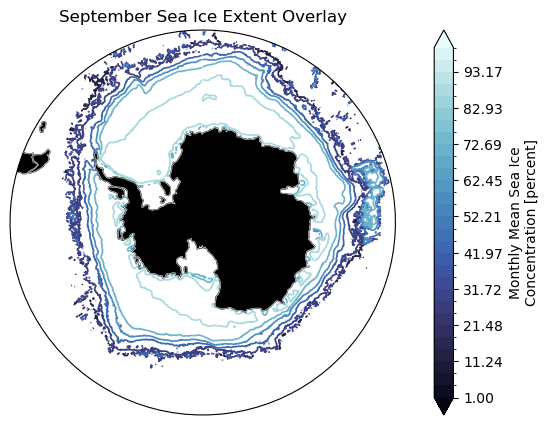

In [120]:
monthly_concentrations= (seaice_conc["icec"].groupby('time.month').mean('time').assign_coords(month=('month', months)))

September= (monthly_concentrations.sel(month = 9 ).squeeze())                   # remove leftover dims


# 2) Plot the field
South_Polar(September, vmin=1, vmax=100, cmap= cmocean.cm.ice)


# 3) Overlay the 15% extent
plt.contour(September["lon"], September["lat"], September,
cmap=cmocean.cm.ice, linewidths=1.2,
transform=ccrs.PlateCarree())

plt.title("September Sea Ice Extent Overlay")
plt.show()


**Figure 12.** Minimum monthly sea-ice extent for the Antarctic.  
Represents the lowest annual ice coverage, generally occurring in February, indicating how much ice remains after the Southern Hemisphere summer melt.

In [ ]:
%config InlineBackend.figure_format = 'retina'
monthly_concentrations= (seaice_conc["icec"].groupby('time.month').mean('time').assign_coords(month=('month', months)))

February = (monthly_concentrations.sel(month = 2 ).squeeze())                   # remove leftover dims


# 2) Plot the field
South_Polar(February, vmin=1, vmax=100, cmap=cmocean.cm.ice)


# 3) Overlay the 15% extent
plt.contour(February["lon"], February["lat"], February,
cmap=cmocean.cm.ice, linewidths=1.2,
transform=ccrs.PlateCarree())

plt.title("February Sea Ice Extent Overlay")
plt.show()


**Figure 13.** Maximum monthly sea-ice extent for the Antarctic.  
Depicts the winter peak in September when Antarctic sea ice reaches its widest extent, demonstrating the strong seasonal contrast of the Southern Ocean.

# Summary: The Changing Cryosphere

The ocean and ice-covered regions of Earth are tightly connected.  
Key observations from this notebook include:

- The oceans are absorbing more heat, causing thermal expansion and rising sea levels.
- The Antarctic and Greenland ice sheets are losing mass, adding more water to the ocean.
- Sea ice is shrinking and changing seasonally, altering how much sunlight the planet reflects.

These changes are measurable indicators of a warming planet.  
Studying them helps us understand how energy moves through the Earth system and how those shifts will affect future climates.
